<div style="border:solid green 2px; padding: 20px">

<b>Привет, Андрей! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Привет, Пётр! Рад знакомству! Огромное спасибо за такую офигенную оперативность в проверке и за фидбэки! Очень круто, что ты так быстро проверил мою работу!)) Это поможет мне оперативно её улучшить и внести необходимые дополнения для написания правильного вывода!
</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Здравствуй, Андрей, рад, радовать, продолжим!)

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab, math
try:
    data = pd.read_csv('C:\\Users\\ludmi\\Documents\\Курс Дата Анализ Яндекс\\Спринт 3\\Анализ недвижимости Питер\\real_estate_data.csv', sep='\t', decimal='.')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Путь некорректен для запуска на платформе, прошу при повторной отправке использовать `try-except`, чтобы задать и локальный путь и путь на платформе Практикума. Проверю до необходимости перезагрузке, а продолжу при второй итерации
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за подсказку! На самом деле я понимал, что это мой локальный путь и не будет работать с этим файлом при открытии, просто я не понимал как реализуют совместную работу над дневниками Jupyter и пока не очень понимаю...Юпитер же сам не подтягивает в свою какую-то локальную папку файл над которым я работаю и его нужно передавать вместе с файлом Юпитера и на новом месте руками переписывать новый доступ к файлу...<br>
    По твоему замечанию я понял, что нужно добавить локальный путь на платформе. Но опять же, этот локальный путь будет работать, если открывать Юпитер также на платформе и из него работать. В других же случаях опять нужно будет перепрописать путь к файлу.<br>
    Также не понял твою фразу:"Проверю до необходимости перезагрузке, ..."
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

* Вот этот путь `/datasets/real_estate_data.csv` у нас с тобой общий, так как папка `datasets` общая)
* Бывает, что какие-то аспекты непонятны без перезагрузки тетрадки и поэтому пишу, чтобы не было удивления, что я не допроверил работу
</div>

Проверим:<br>
- [x]  Названия столбцов;<br>
- [x]  Типы данных (Изменить: first_day_exposition - daytime,  is_apartment - bool);<br>
- [x] Полные дубликаты;
- [x] Пропуски.

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 40)

In [4]:
data.head(15)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0        51.00      8          NaN   False   
1              NaN          11.0        18.60      1          NaN   False   
2              NaN           5.0        34.30      4          NaN   False   
3              NaN          14.0          NaN      9          NaN   False   
4             3.03          14.0        32.00     13          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
6              NaN          26.0        10.60      6          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
9             2.50           9.0        43.60      7          NaN   False   
10            2.67          12.0        20.30      3          NaN   False   
11             NaN           5.0        31.00      4        False   False   
12             NaN           5.0        30.00      5          NaN   False   
13            2.56           5.0        27.00      5          NaN   False   
14             NaN           6.0        17.00      1          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
0       False         25.00      NaN            Санкт-Петербург   
1       False         11.00      2.0             посёлок Шушары   
2       False          8.30      0.0            Санкт-Петербург   
3       False           NaN      0.0            Санкт-Петербург   
4       False         41.00      NaN            Санкт-Петербург   
5       False          9.10      NaN  городской посёлок Янино-1   
6       False         14.40      1.0          посёлок Парголово   
7       False         18.90      2.0            Санкт-Петербург   
8       False          8.81      NaN             посёлок Мурино   
9       False          6.50      2.0            Санкт-Петербург   
10      False          8.50      NaN            Санкт-Петербург   
11      False          6.00      1.0                  Ломоносов   
12      False          9.00      0.0                  Сертолово   
13      False          5.20      1.0                   Петергоф   
14      False          8.00      0.0                     Пушкин   

    airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0            18863.0              16028.0               1.0          482.0   
1            12817.0              18603.0               0.0            NaN   
2            21741.0              13933.0               1.0           90.0   
3            28098.0               6800.0               2.0           84.0   
4            31856.0               8098.0               2.0          112.0   
5                NaN                  NaN               NaN            NaN   

In [5]:
data['first_day_exposition'] = data['first_day_exposition'].apply(pd.to_datetime)
data['is_apartment'] = data['is_apartment'].astype('bool')
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})
print(data.duplicated().sum())
print(data.isna().sum())

0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Согласно полученным данным о пропусках видно, что не всегда все данные заполненяют при составлении объявления. 
С основной частью пропусков невозможно бороться т.е. нет какой-то логичной альтернативы или функции по их заполнению. Например, если не указана высота потолков или площадь кухни, то я не могу ничем заполнить эти данные т.к. это может быть любое значение, а данные по каждой квартире очень индивидуальны и нет каких-то средних или медианных значений. Лучший вариант оставить пропуски т.к в подсчёте среднего значения или медианы они и не будут участвовать и это не исказит эти расчёты. Какие-то пропуски я заполню например число балконов нулями и посмтрю на значения по столбцам на предмет ошибок и неточностей т.е. явно выбивающиеся из логики значения например, максимальная этажность дома или высота потолков.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Касательно замен, можно использовать столбцы, сведения в которых есть и при этом имеется корреляция с тем столбцом, в котором есть пропуски, советую такой способ заполнения! Например в столбце общей площади нет пропусков, а в жилой и площади кухни пропуски есть, эти столбцы имеют высокую корреляцию и можно посчитать некий множитель, чтобы заполнить пропуски площади кухни на основе общей площади   
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо! Я согласен, что такой вариант возможен и я думал над ним, НО:<br>
    В принципе мне не понятна основная суть. Суть продемонстрировать, что я могу заполнить пропуски...Ну да, я могу заполнить пропуски!) Но мне не очень понятно зачем их заполнять. В самом начале исследования открывать датасет и давай всё заполнять, что ни попадя - мне кажется так себе идея... Заполню - искажу имеющиеся данные. Ну, то есть, в любом случае будут искажения - вопрос на сколько сильные. <br>
    Вообще, как я себе представляю идею, заполнять нужно только при острой необходимости. Т.е. эти пропуски явно не дают что-то сделать, явно не дают что-то исследовать ну или данных сильно не хватает или нет полноты представления, например, на графиках, когда зависимость от двух величин, а одна из величин - множественные пропуски. <br>
    Я понимаю суть предложенной идеи, но я просто так не хотел делать. Т.е. я планировал так, что в процессе исследования нужно сначала провести группировки, сортировки, отделить разные параметры, всё рассортировать, разбить на маленькие группки и уже впоследствии, если понадобится, то подумать над заполнением. <br>
    Мне кажется, такой вариант заполнения был бы идеален, когда не прям пальцем в небо т.е. просто найти некую корреляцию между всем и вся, а сделать это как-то предельно релевантно, но здесь для этого нет прямых данных. Если бы была графа с типом и серией дома, то вообще тут красота, можно было бы это сделать совсем точно. Т.е. там, к примеру, серия П44. Тут уже понятно, тут вообще можно сразу заполнить с 99% попаданием. Если, хотя бы тип, например, панелька, монолит или год постройки дома - тогда да, уже совсем неплохо, можно уже тогда заполнять!))<br>
    Но есть косвенные данные. Например, есть удалённость от центра и аэропорта с точностью до метра. Есть предельная этажность. Есть высота потолков. Таким образом, по сути, это трудоёмко, но можно всё заполнить достаточно точно. Если бы была нужда заполнять, что бы я сделал:<br>
    1. Написал функцию, которая на базе точного позиционирования от центра (например с очностью до 5 метров) находит одинаковые дома т.е. если расстояние в метрах одинаковое, то с большой вероятностью это один и тот же дом. И на базе имеющихся объявлений заполняет пропуски в других объявлениях. Таким образом, что если в одном доме указана высота потолков в одном объявлении или предельная этажность, а в другом нет - то можно заполнить эти пропуски. А если нет площади кухни или жилой площади, то тут можно подтянуть корреляционный коэффициент или посмотреть по общей площади и количеству комнат и заполнить по похожему принципу.<br>
    2. После первичного заполнения дальше можно собирать дома одного типа по предельной этажности и высоте потолков. На базе однотипных домов вычислять корреляционный коэффициент или просто заполнять по среднему в зависимости от того, коррелируют ли вообще эти данные или может вообще площадь кухни не зависит от общей площади. Часто в домах одного типа комнат может быть больше, а кухни все одинакового размера.<br>
    3. Потом при фильтрации необходимо учесть параметр 'open_plan' и 'studio'. При свободной планировке вряд ли эти параметры сильно корелируют т.к. планировка может быть любой как захочет конкретный собственник. То есть, при свободной планировке есть конечно, в любом случае, план от застройщика как нужно спланировать, но на практике мало кто следует плану. И студия - тут, как правило, согласно российскому законодательству всё равно есть чёткое разделение по площадям, но оно только на бумаге и люди часто не знают или не считают нужным это заполнять. Поэтому студии тоже в отдельную категорию при заполнении пропусков.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Описанный план очень крутой, спасибо за подробности в описании. 
    
    
От себя добавлю, что первые проекты во многом на отработку различных довольно простых действий, ты полностью прав, что заполнение всех подряд пропусков не всегда отличная идея, задание несёт в себе цель потренировать как можно заполнять, но при этом можно и не заполнять вовсе)

</div>

Изменения:<br>
1. Тип данных first_day_exposition - перевёл в формат daytime
2. Тип данных is_apartment - в логический тип, потому что возможные варианты только True, False - да, нет. Аппартпменты? -Да или нет.
3. Название колонки cityCenters_nearest перевёл в более оптимальный для восприятия змеиный регистр, убрал заглавную букву в названии.

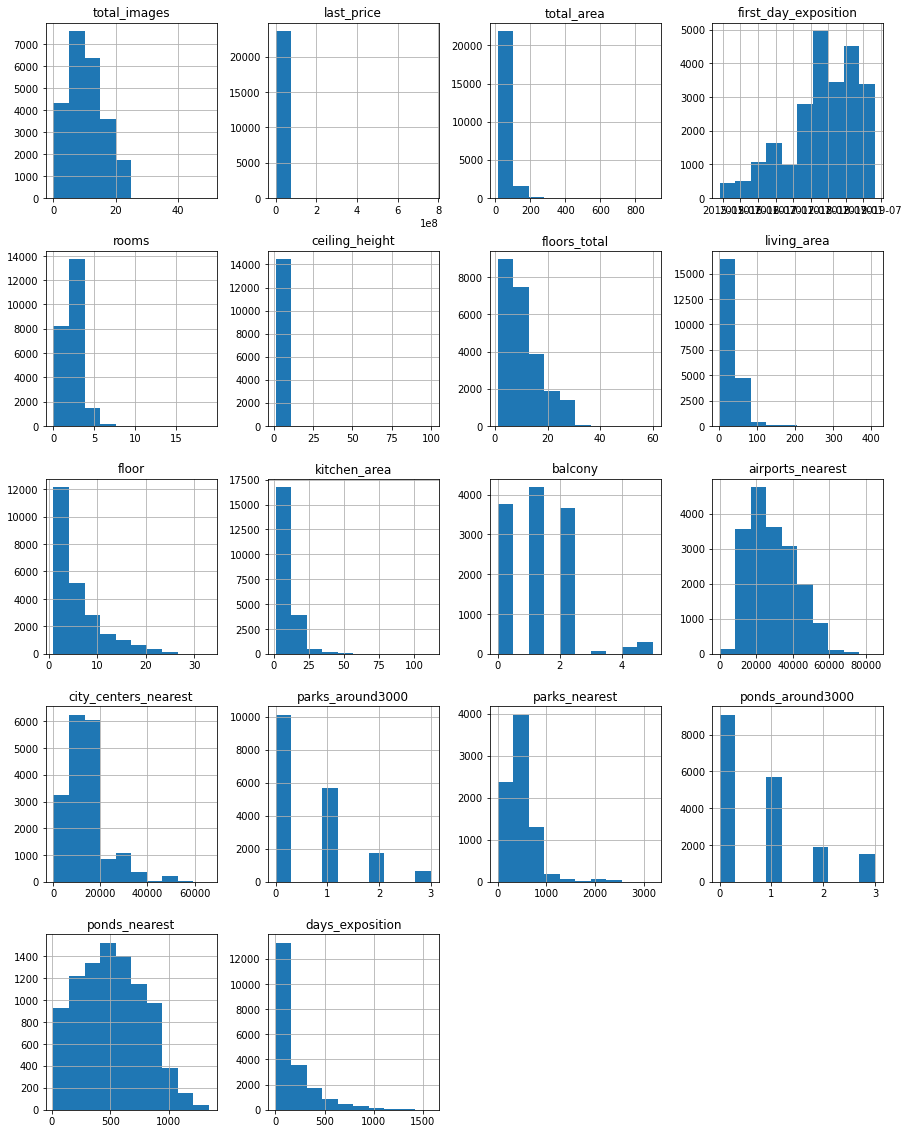

In [6]:
data.hist(figsize = (15, 20));

Построил гистограммы по всем столбцам датафрэйма для визуальной оценки частотности встречаемых параметров.

In [7]:
data['balcony'] = data['balcony'].fillna(0)

Произвёл замену пропусков по балконам на 0.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Абсолютно логично 

### Выполните предобработку данных

In [8]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
)
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

После замены ё на е необходимо просмотреть список всех названий и очистить их от классификаций так, чтобы осталось только само название населённого пункта. 

In [9]:
prefix_names = ['поселок при железнодорожной станции ','садоводческое некоммерческое товарищество ','садовое товарищество ',
                'поселок городского типа ', 'коттеджный поселок ','поселок станции ', 'городской поселок ','^поселок ', '^село ', '^деревня ']

In [10]:
data['locality_name_clear'] = data['locality_name'].replace(prefix_names,'',regex=True)

Заменим пропуски названий на категорию undefined для дальнейшей возможности классификации и сортировки. Название - ключевой параметр для дальнейшей работы и эти пропуски нельзя оставить иначе они помешают в дальнейшей работе.

In [11]:
data['locality_name_clear'] = data['locality_name_clear'].fillna('undefined')
x = data['locality_name_clear'].unique()
x.sort()
print(x)

['undefined' 'Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро'
 'Барышево' 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпоселок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичево' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кин

Вывел отсортированные названия в алфавитном порядке для того, чтобы их можно было визуально отсмотреть и увидеть возможные неявные повторы или ошибки.

In [12]:
data[data['locality_name_clear'] == 'undefined'].sort_values(by = 'last_price', ascending = False)

total_images  last_price  total_area first_day_exposition  rooms  \
22474             7  24000000.0      128.00           2015-07-24      4   
4151             17  17600000.0       89.50           2014-12-09      2   
21276             0  17122148.0      178.30           2017-02-10      1   
8568             10  16000000.0      155.00           2016-05-09      3   
5343             19  13540000.0       85.50           2016-01-20      3   
16610            11  11940000.0      112.00           2015-11-19      3   
20057            13  11500000.0      102.00           2015-10-14      2   
18526             3  10800000.0       86.00           2016-06-24      4   
4189              7   9200000.0       80.00           2015-12-10      3   
1097              3   8600000.0       81.70           2016-04-15      3   
17764             9   8400000.0       94.00           2016-01-24      3   
10122             5   8200000.0       83.00           2015-06-24      4   
9821             13   8000000.0       94.50           2015-01-21      4   
23214             3   7990000.0       56.00           2016-05-31      2   
7600              8   6800000.0       70.00           2016-01-31      3   
12936             6   6800000.0       73.00           2015-11-01      3   
11248            12   6300000.0       63.10           2015-01-16      4   
20654             7   6100000.0       43.00           2016-01-13      1   
21715             2   6047550.0       80.10           2018-07-30      2   
17535             2   5985000.0       79.80           2018-07-30      3   
21333            10   5900000.0       58.00           2015-03-12      3   
21898             2   5886750.0       83.50           2018-07-30      2   
4670              1   5500000.0       83.00           2015-08-14      3   
2033              6   5398000.0       80.00           2017-05-30      3   
2632              2   5130593.0       62.40           2015-10-11      2   
7330              8   5100000.0       63.00           2015-01-27      3   
16499             2   4995573.0       56.90           2016-06-17      2   
6765             20   4895892.0       60.70           2015-03-12      2   
8986             10   4850000.0      103.10           2018-07-10      3   
15686            13   4700000.0       44.00           2015-12-01      2   
19045             6   4650000.0       48.00           2016-01-25      2   
14273             2   4422000.0       60.00           2016-03-23      2   
12879            12   4400000.0       39.20           2016-04-26      1   
19972            20   4361004.0       62.40           2015-09-20      2   
7114              5   4250000.0       56.00           2016-03-16      3   
3574             10   4200000.0       46.50           2016-05-28      2   
15866            10   3950000.0       44.00           2016-04-16      2   
5707              7   3700000.0       30.00           2016-04-29      1   
14342             3   3611000.0       53.50           2017-04-27      1   
21119             8   3500000.0       43.20           2018-11-11      2   
13690             7   3500000.0       71.00           2016-06-23      3   
20590             7   3380000.0       56.00           2017-11-06      2   
2603             20   3351765.0       42.70           2015-09-20      1   
22933            20   3176015.0       33.30           2015-04-22      1   
22717             9   3000000.0       35.00           2018-01-02      1   
13223             1   2919911.0       29.40           2015-03-12      1   
18917             3   2660000.0       37.99           2017-08-17      1   
16561             3   2450000.0       30.00           2016-06-02      1   
20382             8   1750000.0       72.90           2018-10-27      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
22474            2.75           6.0        68.40      6         False   False   
4151             3.00           8.0        39.62      7          True   False   
21276        

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Можно было бы ещё посчитать, сколько значений было до замены, сколько стало после 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Тут я, наверное, не совсем понял, что ты имел ввиду. Если я правильно понял, подсчитать уникальные названия населённых пунктов изначально и после классификации? Если я верно понял, то я добавил этот расчёт ниже. Я, правда, не понял зачем это считать? </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Чтобы оценить от какого количество неявных дубликатов удалось избавиться. 
    
    
И здесь ещё подскажу о методе `nunique`, его результат равен `len` + `unique`

</div>

In [13]:
print(len(data['locality_name'].unique()))
print(len(data['locality_name_clear'].unique()))

331
306


<div class="alert alert-info"> <b>Комментарий студента:</b> На 7,5% количество названий подуменьшилось. </div>

Посмотрим, что попало в категорию 'undefined'. Не так много данных, это не скажется на дальнейшей обработке. Судя по первым строчкам рейтинга undefined, есть часть больших и дорогих квартир. Возможно, это Санкт-Петербург. Но их не много, поэтому на оценку жилья в Санкт-петербурге это не повлияет. Т.к. данные о локации нам не известны, то заполнить населённый пункт мы не можем. Просто оставляем эту категорию.

### Добавьте в таблицу новые столбцы

In [14]:
data['squire_meter_price'] = (data['last_price']/data['total_area']).round(2)

Создал столбец с ценой за 1 м2.

Рассортируем данные по названиям населённых пунктов и посмотрим где есть сильные экстремумы т.е. где есть отличие среднего от медианы более чем на 10%.

In [15]:
data_pivot_smp = data.pivot_table(index = 'locality_name_clear', values = 'squire_meter_price', \
                                  aggfunc = ['median','mean','count']).reset_index()
data_pivot_smp.columns = ['locality_name_clear','median','mean','count']

data_pivot_smp.sort_values(by = 'median', ascending = False)
data_pivot_smp[abs(data_pivot_smp['mean'] - data_pivot_smp['median']) / data_pivot_smp['mean'] * 100 > 10]


locality_name_clear      median           mean  count
21             Будогощь   36741.665   31184.540000      4
26               Вещево   23606.560   28350.770000      5
65          Зеленогорск  101666.665  115122.799583     24
123           Лисий Нос   74525.750  100660.816667      3
124       Лодейное Поле   28373.075   31769.410500     20
164              Оредеж   19877.680   17707.713333      3
213              Репино   86542.205  104238.612500      4
282           Усть-Луга   36363.640   41405.462000      5

Итак, таких населённых пунктов не много. Из значимых по количеству объявлений из данного списка только Зеленогорск и Лодейное Поле. Возможно, там есть какие-то предложения по более элитной недвижимости, а в целом цена за метр невысока. При необходимости, можно в дальнейшем рассмотреть эти населённые пункты по-подробнее.

In [16]:
data['publication_day'] = data.first_day_exposition.dt.dayofweek
data['publication_month'] = data.first_day_exposition.dt.month
data['publication_year'] = data.first_day_exposition.dt.year
conditions = [
    data['floor'].eq(1),
    data['floor'] == data['floors_total'],
    data['floor'] != data['floors_total']
]

choices = ['первый', 'последний', 'другой']

data['floor_type'] = np.select(conditions, choices, default=0)
data['city_center_km'] = (data['city_centers_nearest']/1000).round(0)

Создал дополнительные столбцы с днём, месяцем и годом публикации объявлений. Произвёл интерпретацию типа предлагаемого этажа и сохранил в отдельный столбец. Вычислил расстояние до центра в километрах и сохранил в отдельный столбец.

### Проведите исследовательский анализ данных

In [17]:
print(len(data.query('total_area < living_area | kitchen_area > total_area')))
print(len(data.query('kitchen_area > living_area')))
print(len(data.query('kitchen_area > (total_area - living_area)')))
print(len(data.query('(living_area == kitchen_area | total_area == living_area)')))


0
355
67
42


Посмотрим по-внимательнее на данные. Какие ошибки явно допущены при описании общей площади, жилой площади и площади кухни.

In [18]:
data.query('(total_area == living_area)')

total_images  last_price  total_area first_day_exposition  rooms  \
9861             10   2350000.0        25.0           2017-12-03      0   
12691             1   3700000.0        24.2           2017-11-10      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
9861              NaN          22.0         25.0     17          True   False   
12691             NaN          19.0         24.2     13          True   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
9861        True           NaN      2.0   поселок Мурино               NaN   
12691       True           NaN      1.0  Санкт-Петербург           17837.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
9861                    NaN               NaN            NaN   
12691               16840.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_clear  \
9861                NaN            NaN             13.0              Мурино   
12691               2.0          210.0             74.0     Санкт-Петербург   

       squire_meter_price  publication_day  publication_month  \
9861             94000.00                6                 12   
12691           152892.56                4                 11   

       publication_year floor_type  city_center_km  
9861               2017     другой             NaN  
12691              2017     другой            17.0

Было два объявления с ошибкой, где указано, что жилая площадь равна общей. И это не студия. Похоже, ошибка, что забыли указать, что это квартира-студия, потому что площадь 24 и 25м2. Это явно студия. Произведём исправления.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Спасибо, что такие аномалии расматриваешь, в целом проверяешь корректность данных

In [19]:
data.loc[9861, 'studio'] = True
data.loc[12691, 'studio'] = True

In [20]:
x = data.query('(living_area + kitchen_area) > total_area')
x=x.sort_values(by = 'total_area')
print(len(x))
x.loc[:, x.columns.isin(['total_area', 'living_area', 'kitchen_area', \
                         'locality_name_clear', 'squire_meter_price', 'is_apartment', 'studio'])]

64


total_area  living_area  is_apartment  studio  kitchen_area  \
7755        20.67        14.95          True   False         14.95   
545         23.80        20.00          True   False          5.00   
1407        24.60        18.00          True   False         18.20   
10725       25.60        14.17          True   False         14.17   
6559        26.00        20.00          True   False          8.00   
17492       29.00        26.00          True   False          8.00   
184         30.20        26.10          True   False          6.20   
551         31.59        30.55          True   False          9.28   
18455       32.00        30.00          True   False          8.20   
3426        32.51        28.85          True   False          7.89   
11579       33.00        26.00          True   False         26.00   
15513       33.82        33.00          True   False          9.32   
21868       34.30        30.60          True   False          8.00   
696         34.69        23.43          True   False         23.43   
2950        35.00        33.00          True   False          8.50   
19908       36.00        28.00         False   False          9.00   
16598       37.00        30.00         False   False          9.00   
11313       37.00        35.00          True   False         16.00   
1992        37.40        36.40          True   False          8.60   
1155        38.00        33.00          True   False         12.00   
7680        38.80        33.00         False   False          6.00   
6557        39.00        34.00          True   False         11.00   
12530       39.03        36.90         False   False         18.60   
11594       39.40        35.00          True   False          9.10   
10652       40.00        36.00          True   False         10.20   
19535       40.08        34.60          True   False          9.10   
20490       41.00        35.10          True   False         10.30   
9333        41.90        33.30          True   False         14.10   
5096        42.00        34.00          True   False          9.00   
17110       42.00        30.00         False   False         13.00   
21377       42.00        37.70         False   False         11.00   
11150       42.30        37.70         False   False          5.40   
11158       42.50        27.10          True   False         21.90   
10913       43.30        40.70          True   False         12.30   
21824       44.00        38.00         False   False          8.60   
16911       44.84        40.00          True   False         12.85   
10696       45.00        42.00         False   False          5.30   
21956       46.00        44.00          True   False          8.00   
20034       46.00        37.00          True   False         11.00   
4366        47.70        39.80          True   False         28.20   
11472       48.00        34.50         False   False         18.00   
1060        50.00        39.00         False   False         20.50   
601         53.70        48.30          True   False          7.00   
1354        54.50        38.00          True   False         19.00   
21519       55.00        52.50         False   False          9.00   
17151       58.50        54.50          True   False          7.10   
9834        59.00        53.00          True   False          8.60   
21266       60.00        35.00          True   False         35.00   
1854        60.20        55.00          True   False         14.84   
19344       62.00        42.00         False   False         21.00   
23202       67.92        63.00          True   False         13.04   
9385        69.00        61.00          True   False          8.30   
6802        69.00        64.00         False   False         25.00   
12159       70.00        51.00          True   False         27.00   
11046       70.00        50.00          True   False         32.10   
3891        70.40        68.10          True   False          9.00   
13428       75.00

Ошибочных данных, где жилая площадь + кухня больше общей площади - 64 шт. Возможных ошибок много. Точная природа неизвестна. Возможно, где-то ошибка в площади кухни, где-то в жилой площади. Скорее всего, данные по общей площади верны т.к. обычно это ключевой параметр в объявлении. В дальнейшем, не будем учитывать эти данные в метриках по кухне или по жилой площади. Или нужно будет эти данные подправлять на основе корреляции.

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
195


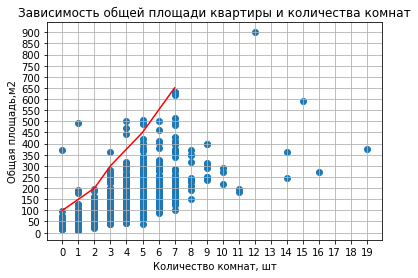

In [21]:
print(data['rooms'].unique())
print(len(data[data['rooms'] > 5]))

plt.scatter(data['rooms'], data['total_area'])
plt.title("Зависимость общей площади квартиры и количества комнат")
plt.xlabel("Количество комнат, шт")
plt.ylabel("Общая площадь,м2")
plt.xticks(np.arange(0,20,step=1))
plt.yticks(np.arange(0,data['total_area'].max()+50,step=50))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()
a = [0,1,2,3,5,7]
b = [100,150,200,300,450,650]
plt.plot(a,b,color = 'red')
plt.show()

Построил диаграмму рассеяния общей площади от количества комнат. Кривая аппроксимирующей тенденции - красная линяя. Т.е. чем больше комнат тем и общая площадь больше - это очевидно. Но есть часть данных, выбивающихся из общей тенденции. Рассмотрим их отдельно.

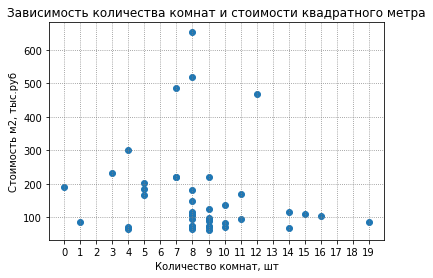

In [22]:
x = data.query('rooms > 7 | (rooms < 4 & total_area > 300) | (rooms == 4 & total_area > 400) \
           | (rooms == 5 & total_area > 450)| (rooms == 7 & total_area > 600)')

plt.scatter(x['rooms'], x['squire_meter_price']/1000)
plt.title("Зависимость количества комнат и стоимости квадратного метра")
plt.xlabel("Количество комнат, шт")
plt.ylabel("Стоимость м2, тыс.руб")
plt.xticks(np.arange(0,20, step = 1))
#plt.yticks(np.arange(0,x['squire_meter_price'].max()))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()
plt.show()

Есть сильно большие единичные величины стоимоти м2. Скорее всего - это элитная недвижимость. Она как отдельный класс и может влиять на среднюю стоимость м2 жилья. При необходимости, при дальнейшем исследовании можно будет выделить такую недвижимость в отдельную категорию. Далее просмотрим данные по таким объявлениям на возможные ошибки или явно бросающиеся несоответствия.

In [23]:
x[x['squire_meter_price']>200000]

total_images   last_price  total_area first_day_exposition  rooms  \
3117             19  140000000.0       631.0           2019-03-30      7   
6183             10   84382000.0       363.1           2018-10-07      3   
6621             20   99000000.0       488.0           2017-04-09      5   
7857             11  150000000.0       230.0           2017-10-25      8   
12859            20  140000000.0       631.2           2019-04-09      7   
15016             8  150000000.0       500.0           2016-01-13      4   
15151            15   88000000.0       400.0           2019-03-27      9   
15651            20  300000000.0       618.0           2017-12-18      7   
19540             8  420000000.0       900.0           2017-12-06     12   
19865            20  180000000.0       347.0           2015-01-21      8   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
3117              NaN           5.0          NaN      5          True   False   
6183              NaN          16.0          NaN     12          True   False   
6621             2.95          20.0        216.0     17          True   False   
7857              NaN           8.0        220.0      8          True   False   
12859            3.90           4.0        322.3      4          True   False   
15016            3.20           7.0          NaN      7          True   False   
15151            2.50           2.0        250.0      1          True   False   
15651            3.40           7.0        258.0      5          True   False   
19540            2.80          25.0        409.7     25          True   False   
19865            3.90           6.0        260.0      3          True   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
3117       False         60.00      0.0  Санкт-Петербург           25707.0   
6183       False         31.73      0.0  Санкт-Петербург           31887.0   
6621       False         50.00      0.0  Санкт-Петербург           27641.0   
7857       False           NaN      0.0  Санкт-Петербург           25525.0   
12859      False         19.50      1.0  Санкт-Петербург           25707.0   
15016      False           NaN      0.0  Санкт-Петербург           33058.0   
15151      False         50.00      0.0  Санкт-Петербург           24395.0   
15651      False         70.00      0.0  Санкт-Петербург           32440.0   
19540      False        112.00      0.0  Санкт-Петербург           30706.0   
19865      False         45.00      0.0  Санкт-Петербург           23962.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
3117                 4972.0               0.0            NaN   
6183                 4979.0               0.0            NaN   
6621                 4598.0               1.0          646.0   
7857                 5845.0               2.0          116.0   
12859                4972.0               0.0            NaN   
15016                6150.0               3.0          209.0   
15151                2725.0               2.0          315.0   
15651                5297.0               0.0            NaN   
19540                7877.0               0.0            NaN   
19865                3794.0               2.0          537.0   

       ponds_around3000  ponds_nearest  days_exposition locality_name_clear  \
3117                2.0          210.0              NaN     Санкт-Петербург   
6183                2.0          182.0              NaN     Санкт-Петербург   
6621                1.0          368.0            351.0     Санкт-Петербург   
7857                0.0            NaN            135.0     Санкт-Петербург   
12859               2.0          210.0              NaN     Санкт-Петербург   
15016               3.0          531.0            303.0     Санкт-Петербург   
15151               1.0          578.0              NaN     Санкт-Петербург   
15651               2.0          198.0            111.0     Санкт-Петербург   
195

In [23]:
x[x['rooms']>9]

total_images   last_price  total_area first_day_exposition  rooms  \
648               3   17500000.0       183.7           2018-07-01     11   
866               5   25000000.0       363.0           2017-12-23     14   
4149              6   23000000.0       272.6           2018-01-11     10   
5358             20   65000000.0       590.0           2019-02-14     15   
9688              8   33000000.0       194.1           2017-02-07     11   
14498             6   32250000.0       374.6           2018-06-09     19   
18119             4   15500000.0       216.1           2016-07-04     10   
18848             6   28500000.0       270.0           2015-03-02     16   
18891            11   40000000.0       290.0           2016-06-21     10   
19540             8  420000000.0       900.0           2017-12-06     12   
20829             6   28659000.0       245.4           2016-03-31     14   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
648              3.40           7.0        138.8      7          True   False   
866              3.16           5.0        222.0      4          True   False   
4149             3.14           7.0        145.9      7          True   False   
5358             3.50           6.0        409.0      3          True   False   
9688             3.43           5.0        129.0      2          True   False   
14498             NaN           5.0        264.5      2          True   False   
18119            3.15           5.0        161.4      2          True   False   
18848            3.00           4.0        180.0      4          True   False   
18891            3.50           6.0        189.4      6          True   False   
19540            2.80          25.0        409.7     25          True   False   
20829             NaN           4.0        168.3      2          True   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
648        False          13.3      0.0  Санкт-Петербург           23606.0   
866        False          16.6      0.0  Санкт-Петербург           38076.0   
4149       False          18.8      1.0  Санкт-Петербург           10726.0   
5358       False         100.0      0.0  Санкт-Петербург           24447.0   
9688       False          11.9      0.0  Санкт-Петербург           21469.0   
14498      False          27.6      0.0  Санкт-Петербург           19497.0   
18119      False          19.8      0.0  Санкт-Петербург           24353.0   
18848      False          13.0      1.0  Санкт-Петербург           23575.0   
18891      False          30.0      1.0  Санкт-Петербург           26229.0   
19540      False         112.0      0.0  Санкт-Петербург           30706.0   
20829      False          25.9      0.0  Санкт-Петербург           21104.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
648                  3148.0               0.0            NaN   
866                  7950.0               0.0            NaN   
4149                12169.0               1.0          191.0   
5358                 4666.0               1.0          767.0   
9688                 1015.0               1.0          686.0   
14498                3574.0               0.0            NaN   
18119                4921.0               1.0          368.0   
18848                4142.0               1.0          516.0   
18891                4932.0               3.0          316.0   
19540                7877.0               0.0            NaN   
20829                2054.0               3.0          541.0   

       ponds_around3000  ponds_nearest  days_exposition locality_name_clear  \
648                 0.0            NaN              NaN     Санкт-Петербург   
866                 2.0          435.0            418.0     Санкт-Петербург   
4149                1.0          531.0              NaN     Санкт-Петербург   
5358                0.0            NaN             14.0     Санкт-Петербург   
9688                

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А две ячейки выше просто для вывода этих значений? Ожидал, что ты избавишься от таких отличающихся строк, которые похожи на аномалии, может быть действительно элитную недвижимость 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Моя идея была вывести и посмотреть глазом, может быть, там в этих объявлениях было что-то совсем неправильное и будет сразу понятно, что это аномалии. Но, в принципе, данные выглядят логично. Комнат много, но и площадь огромная. Зная, как в Санкт-Петербурге из дореволюционных домов образовывались коммуналки, а потом, уже в новой России, по-тихоньку происходило их расселение, можно предположить, что это скорее всего не аномалии, а верные данные. Постепенно коммуналки расселялись, а эти многокомнатные квартиры переходили в чьё-либо владение. Все эти многокомнатные квартиры объединяет два параметра:<br>
- большая площадь<br>
- расположение в центре<br>
Поэтому, просмотрев данные я пришёл к выводу, что это не вбросы и не аномалии, а реальные предложения. Возможно, просто где-то очень маленькие комнаты, как кладовки, но всё-же отдельные комнаты и их просто все подсчитали.<br>
    По сему, я пришёл к выводу, что избавляться от таких данных - это неверный путь. <br>
Относительно замечания, что вывел просто посмотреть - согласен. Может быть не совсем логично просто посмотреть и ничего не делать. Я вообще предполагал дойти до конца и в зависимости от дальнейшего исследования и обстоятельств решить, мешают ли эти данные и что с ними делать. Но в принципе, я согласен, есть смысл создать категорию элитной недвижимости и отсортировать эти квартиры. Я так и хотел сделать в дальнейшем, но раз ты написал, то, пожалуй, создам столбец "is_elite" и помечу дорогие и большие квартиры как True.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо за итог по этой части исследования, не хватило изначально некоторой точки
</div>

In [24]:
data['is_elite'] = np.where(((data['rooms'] > 7) & (data['squire_meter_price'] > 150000)) | ((data['total_area'] > 300) & (data['squire_meter_price'] > 150000)), True, False)

In [25]:
x = data.loc[:, data.columns.isin(['total_area', 'living_area', 'kitchen_area', \
                                   'last_price', 'rooms', 'ceiling_height', 'floor_type','floors_total',\
                                   'cityCenters_nearest', 'parks_nearest'])]

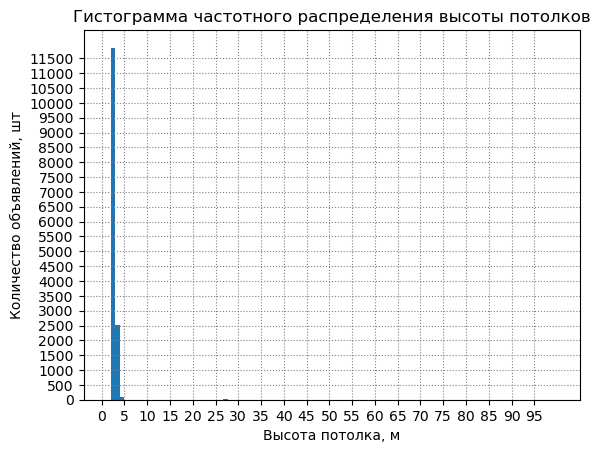

In [26]:
plt.hist(data['ceiling_height'], bins=100)
plt.title("Гистограмма частотного распределения высоты потолков")
plt.xlabel("Высота потолка, м")
plt.ylabel("Количество объявлений, шт")
plt.xticks(np.arange(0,100,step=5))
plt.yticks(np.arange(0,12000, step=500))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

In [27]:
data[data['ceiling_height']>9]

total_images  last_price  total_area first_day_exposition  rooms  \
355              17   3600000.0        55.2           2018-07-12      2   
3148             14   2900000.0        75.0           2018-11-12      3   
4643              0   4300000.0        45.0           2018-02-01      2   
4876              7   3000000.0        25.0           2017-09-27      0   
5076              0   3850000.0        30.5           2018-10-03      1   
5246              0   2500000.0        54.0           2017-10-13      2   
5669              4   4400000.0        50.0           2017-08-08      2   
5807             17   8150000.0        80.0           2019-01-09      2   
6246              6   3300000.0        44.4           2019-03-25      2   
9379              5   3950000.0        42.0           2017-03-26      3   
10773             8   3800000.0        58.0           2017-10-13      2   
11285             0   1950000.0        37.0           2019-03-20      1   
14382             9   1700000.0        35.0           2015-12-04      1   
15061            19   5600000.0        56.4           2018-05-11      2   
17496            15   6700000.0        92.9           2019-02-19      3   
17857             1   3900000.0        56.0           2017-12-22      3   
18545             6   3750000.0        43.0           2019-03-18      2   
20478            11   8000000.0        45.0           2017-07-18      1   
20507            12   5950000.0        60.0           2018-02-19      2   
21377            19   4900000.0        42.0           2017-04-18      1   
21824            20   2450000.0        44.0           2019-02-12      2   
22309            20   5300000.0        45.0           2017-09-30      1   
22336            19   9999000.0        92.4           2019-04-05      2   
22869             0  15000000.0        25.0           2018-07-25      1   
22938            14   4000000.0        98.0           2018-03-15      4   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
355              25.0           5.0         32.0      2         False   False   
3148             32.0           3.0         53.0      2          True   False   
4643             25.0           9.0         30.0      2          True   False   
4876             27.0          25.0         17.0     17          True   False   
5076             24.0           5.0         19.5      1          True   False   
5246             27.0           5.0         30.0      3          True   False   
5669             26.0           9.0         21.3      3          True   False   
5807             27.0          36.0         41.0     13          True   False   
6246             25.0           5.0         31.3      5          True   False   
9379             25.0           5.0         30.0      2          True   False   
10773            27.0          10.0         30.1      3         False   False   
11285            25.0           5.0         17.0      4         False   False   
14382            25.0           5.0         20.0      2         False   False   
15061            14.0          14.0         32.4      5          True   False   
17496            20.0          17.0         53.2     14          True   False   
17857            27.0           5.0         33.0      4         False   False   
18545            25.0           5.0         29.0      3         False   False   
20478            27.0           4.0         22.0      2          True   False   
20507            22.6          14.0         35.0     11          True   False   
21377            27.5          24.0         37.7     19         False   False   
21824            27.0           2.0         38.0      2         False   False   
22309            10.3          16.0         15.5     15          True   False   
22336            32.0           6.0         55.5      5         False   False   
22869           100.0           5.0         14.0      5          True   False   
22938            27.0          

Высота потолков больше 9 метров. Исходя из общих знаний - это либо опечатка либо ошибка. Поработаем с этими данными.

In [28]:
data.loc[(data['ceiling_height'] >= 24) & (data['ceiling_height'] < 35), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >25) & (data['ceiling_height'] < 35), 'ceiling_height'] / 10
data.loc[data['ceiling_height'] > 9, 'ceiling_height'] = np.NaN

Произвёл замену высот от 24 метров до 35 на значения меньшие на порядок. Очевидно - это ошибка ввода. По другим значениям больше 9 метров - явно ошибка, но не понятно, какая реальная высота. Явных аппроксимирующих функций в данном случае нет, заменим на NaN чтобы эти данные не мешали обработке.

Построим ещё раз гистограмму уже по отфильтрованным данным

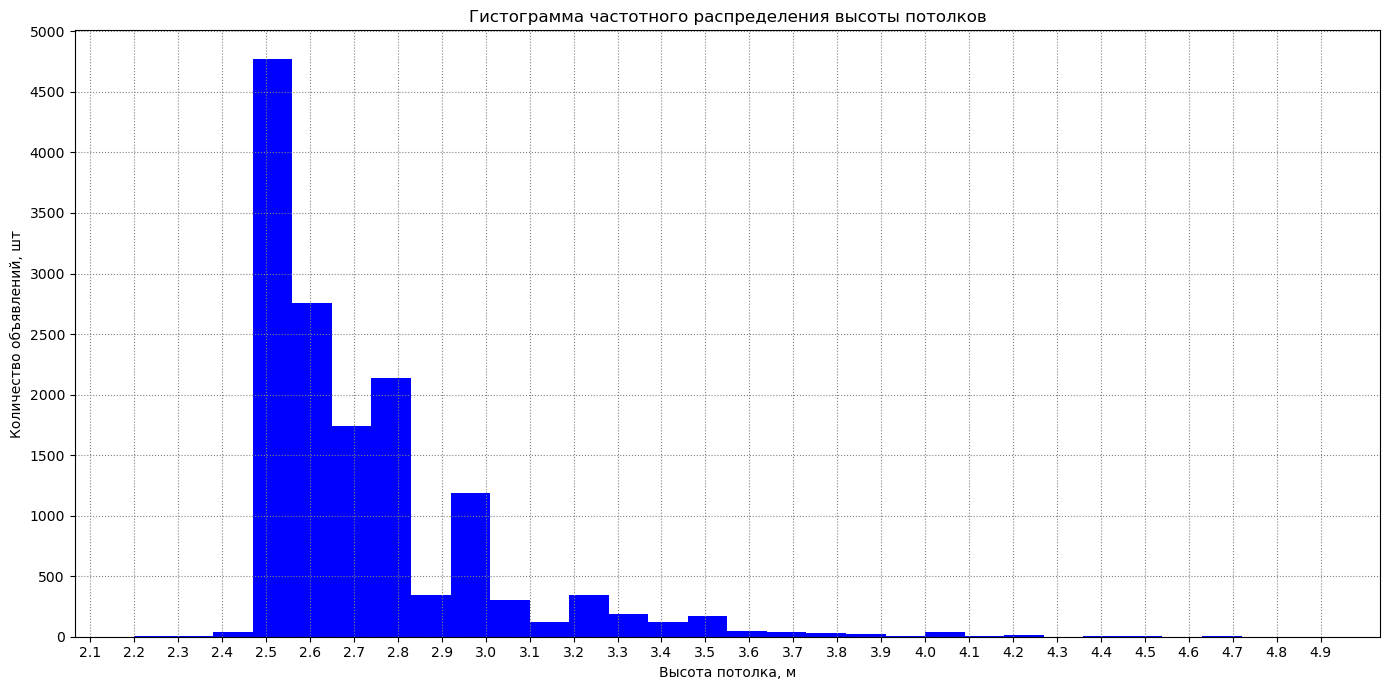

In [29]:
x = data[(data['ceiling_height']>2) & (data['ceiling_height']<5)]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(14, 7), 
                        tight_layout = True)
# Adding extra features    
plt.title("Гистограмма частотного распределения высоты потолков")
plt.xlabel("Высота потолка, м")
plt.ylabel("Количество объявлений, шт")
# Adding limits, steps
plt.xticks(np.arange(2,5,step=0.1))
plt.yticks(np.arange(0,8000, step=500))
# Adding grid
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()
#crteating histogramm
plt.hist(x['ceiling_height'], bins=30, color='blue')

plt.show()

Как видно, после произведения замен новая гистограмма стала информативна. Можно теперь визуально оценить кто занимает лидирующие позиции. А это стандартная высота потолков для "хрущёвок" - 2,5м. Далее по нисходящей, а потом чуть увеличение на высоте 2,8. <br>
И вот тут, если вернуться к заполнению пропусков по площади, например общей площади и площади кухни, то логичнее всего, на мой взгляд, искать корреляцию между площадью кухни и общей площадью, к примеру, произведя сортировку по высоте потолка. Т.е. зная высоту потолка, мы примерно сортируем дома по одному типу. Условно, 2,5 - это скорее всего "хрущёвки" с очень маленькими кухнями. Далее 2,6-2,7м - "панельки", кухни, скорее всего, чуть больше. Далее 2,8 - это скорее всего более новые дома. Далее 2,9-3,0 - скорее всего, новые дома, монолит. Далее 3,0 - 3,5 - это уже, скорее всего, более старые дома, "сталинки" и "дореволюционные", возможно. <br>
В общем, так, мне кажется, можно вообще "пройтись по потолкам" с шагом 0,05м и приблизить корреляционный показатель общая площадь - площадь кухни ближе к истине.<br>
К примеру, как на нижеследующей гистограмме. 

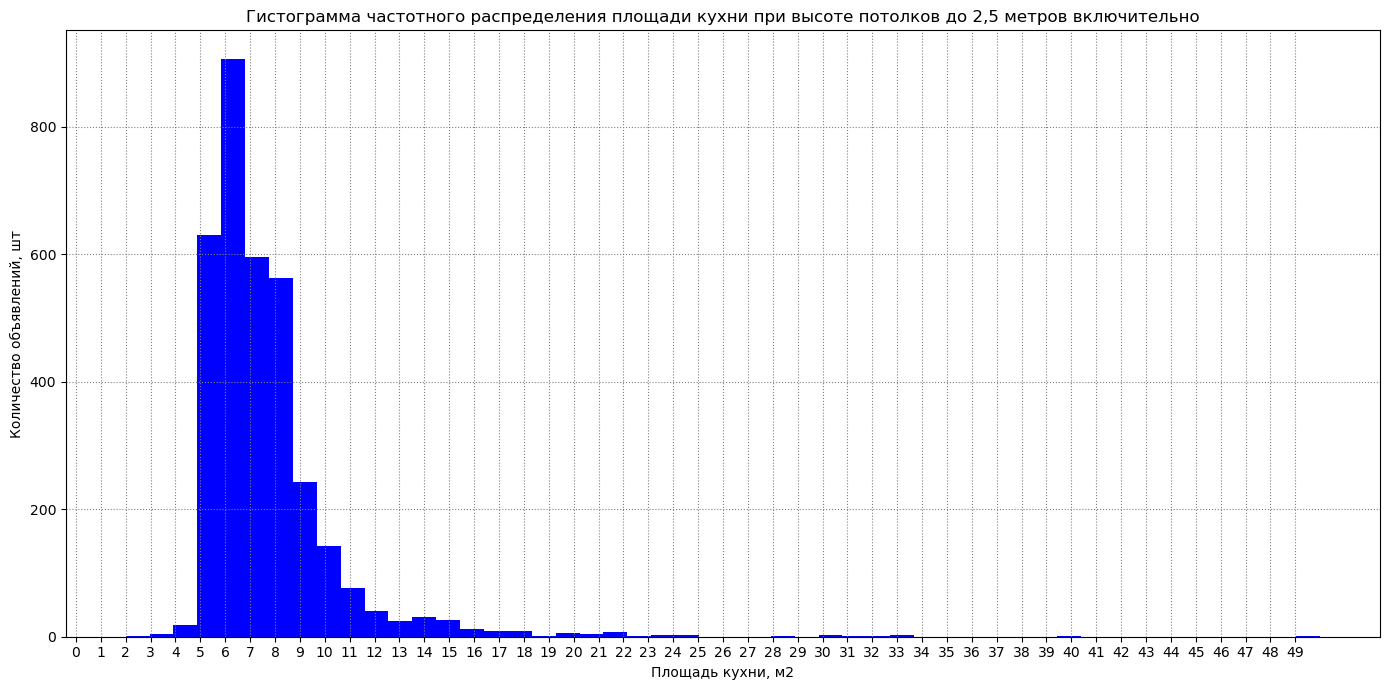

In [30]:
x = data[(data['ceiling_height']<=2.5)]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(14, 7), 
                        tight_layout = True)
# Adding extra features    
plt.title("Гистограмма частотного распределения площади кухни при высоте потолков до 2,5 метров включительно")
plt.xlabel("Площадь кухни, м2")
plt.ylabel("Количество объявлений, шт")
# Adding limits, steps
plt.xticks(np.arange(0,50,step=1))
# plt.yticks(np.arange(0,8000, step=500))
# Adding grid
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()
#crteating histogramm
plt.hist(x['kitchen_area'], bins=50, color='blue')

plt.show()

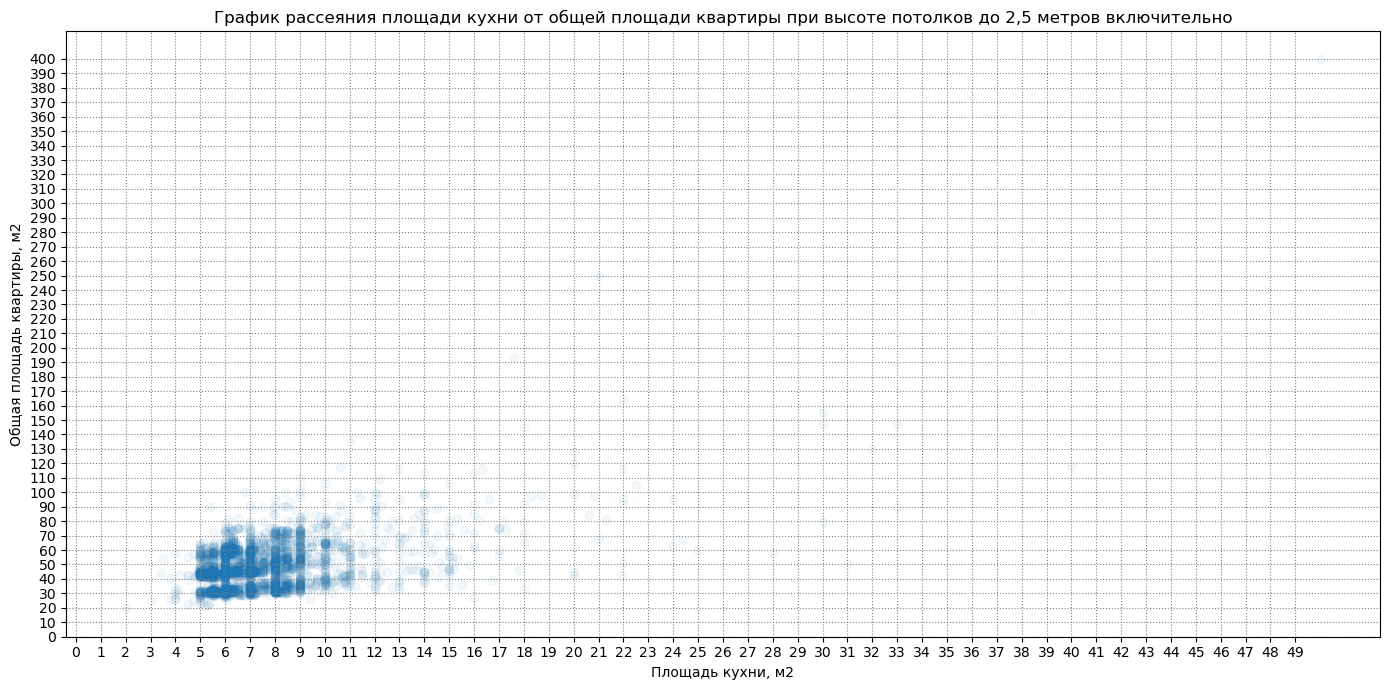

In [31]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(14, 7), 
                        tight_layout = True)
# Adding extra features    
plt.title("График рассеяния площади кухни от общей площади квартиры при высоте потолков до 2,5 метров включительно")
plt.xlabel("Площадь кухни, м2")
plt.ylabel("Общая площадь квартиры, м2")
#crteating histogramm
plt.scatter(x['kitchen_area'], x['total_area'], alpha = 0.05)
# Adding limits, steps
plt.xticks(np.arange(0,50,step=1))
plt.yticks(np.arange(0,410, step=10))
# Adding grid
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

plt.show()

Т.е. в лидерах у нас кухня площадью 6 м2, что и предполагалось. Т.е. мы видим, что площадь кухни преимущественно 5-9м2 и направление чуть высходящее. Т.е. чем больше площадь квартиры, тем кухня чуть больше. Но диапазон изменения достаточно маленький. И общая площадь изменяется преимущественно 30-80 м2 и площадь кухни изменяется 5-9м2. Тут даже скорее площадь кухни даже не от общей площади зависит, а от типа дома. Мы видим, что в квартире 30м2 кухня может быть и 5, и 6 ..., и 9м2. Таким образом, если для данного сегмента квартир производить заполнение данных по площади кухни, то я бы, скорее всего, в диапазоне общей площади квартиры 30-70м2 заполнял бы средним значением площади кухни.<br>
НО, для подбора ещё более точного корреляционного коэффициента тут ещё стоит добавить этажность дома. И тогда, зная высоту потолков, зная максимальную этажность дома можно с большей точностью вычислить тип дома. И уже тогда, после тщательной сортировки, вычислять корреляционный коэффициент общей площади и площади кухни. <br>
Рассмотрим эту идею на нижеследующем графике.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
* Ещё раз благодарю за экскурс и логичный акцент на том, что типовые дома позволили бы сказать больше
* Отмечу, что такой диапазон значений по оси `x` `y` можно было бы уменьшить, считаю его избыточным. Вернулся к комментарию, долго вглядывался, обнаружил что-то в углу, всё-таки такие квартиры были...)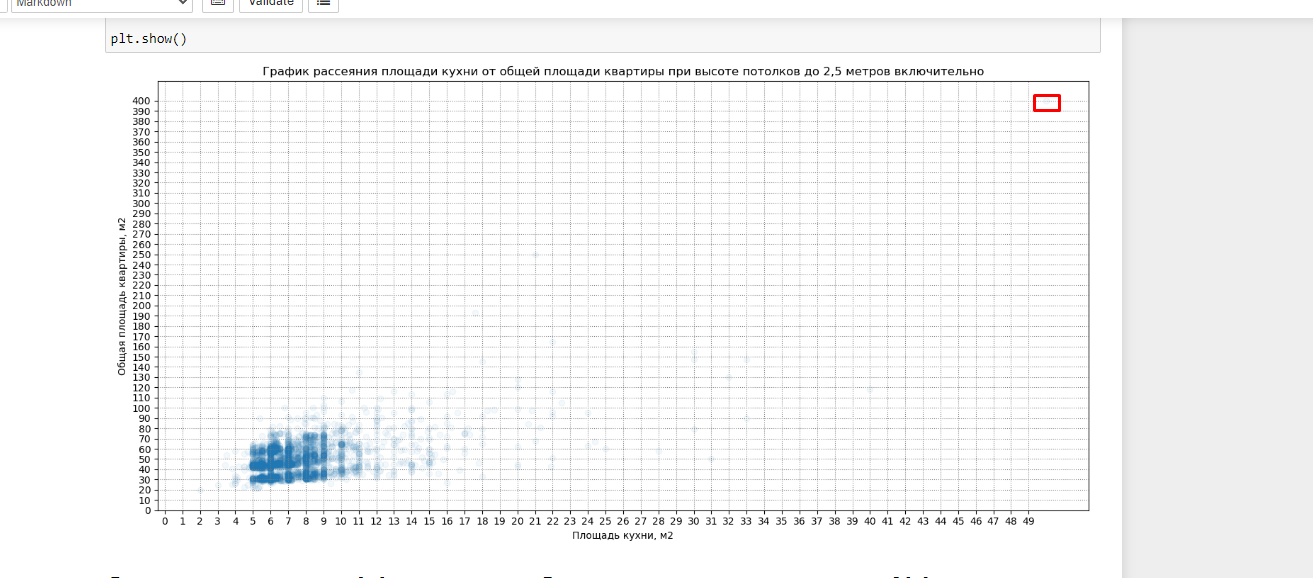    

</div>

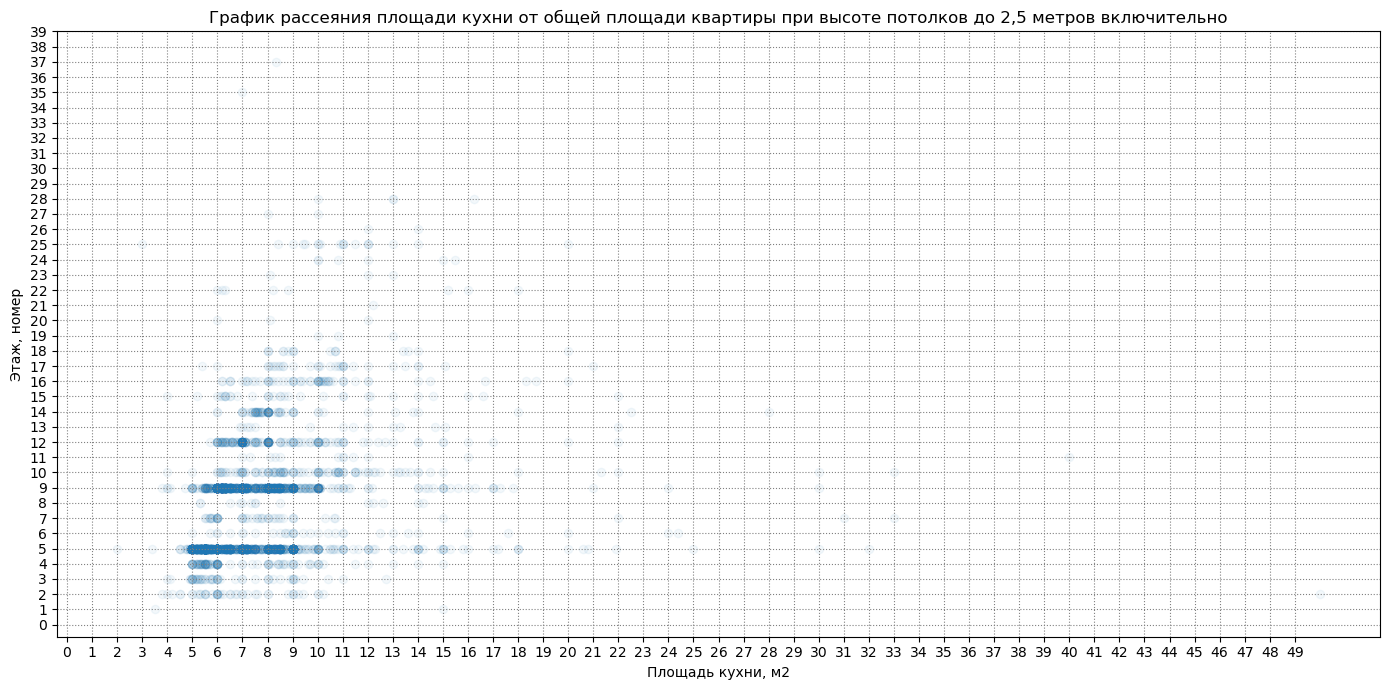

In [32]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(14, 7), 
                        tight_layout = True)
# Adding extra features    
plt.title("График рассеяния площади кухни от общей площади квартиры при высоте потолков до 2,5 метров включительно")
plt.xlabel("Площадь кухни, м2")
plt.ylabel("Этаж, номер")
#crteating histogramm
plt.scatter(x['kitchen_area'], x['floors_total'], alpha = 0.05)
# Adding limits, steps
plt.xticks(np.arange(0,50,step=1))
plt.yticks(np.arange(0,40, step=1))
# Adding grid
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

plt.show()

Тут тоже интересно. Основная масса у нас пятиэтажки, девятиэтажки - это у нас "хрущёвки". Далее 10 этажки, 12 этажки - "панельки". Ну и дальше по-немногу. Ещё по-немногу 2-х, 3-х, 4-х этажки. Это что-то совсем старое...<br>
А посмотрим-ка для пятиэтажек. Какая у нас связь общей площади и площади кухни.

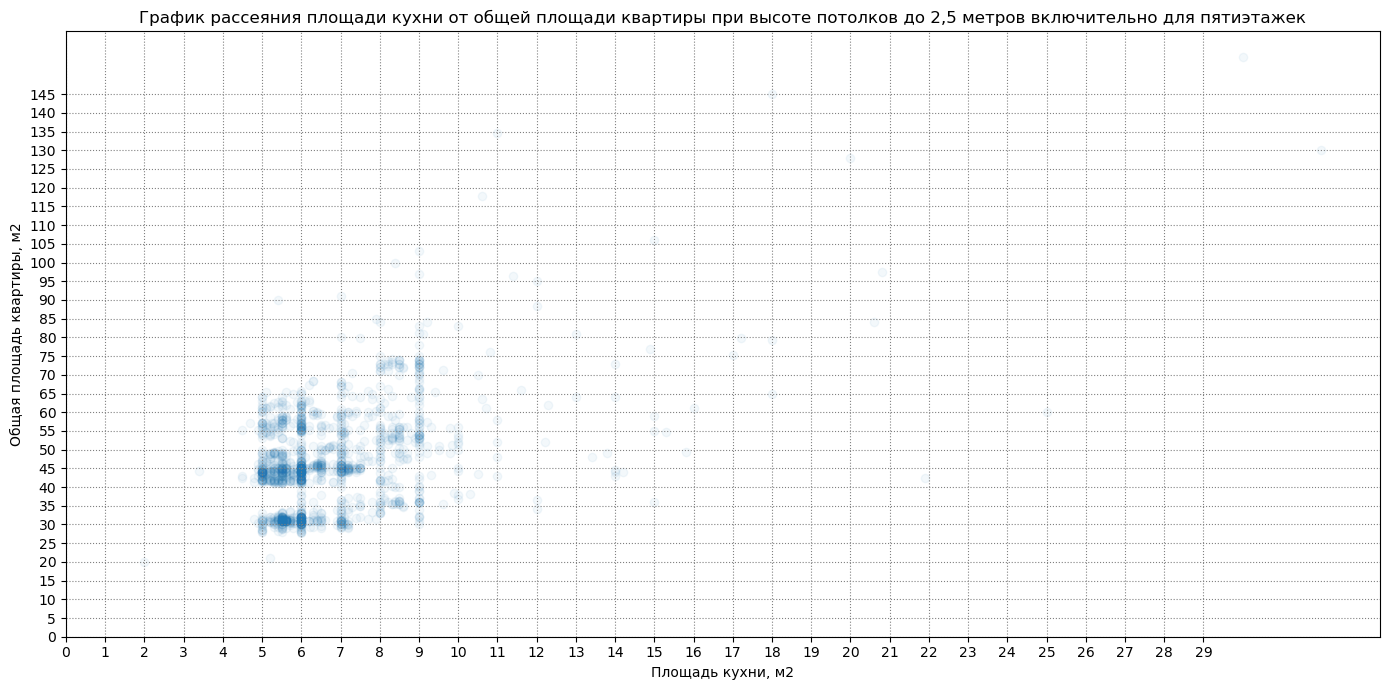

In [33]:
x = x[x['floors_total']==5]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(14, 7), 
                        tight_layout = True)
# Adding extra features    
plt.title("График рассеяния площади кухни от общей площади квартиры при высоте потолков до 2,5 метров включительно для пятиэтажек")
plt.xlabel("Площадь кухни, м2")
plt.ylabel("Общая площадь квартиры, м2")
#crteating histogramm
plt.scatter(x['kitchen_area'], x['total_area'], alpha = 0.05)
# Adding limits, steps
plt.xticks(np.arange(0,30,step=1))
plt.yticks(np.arange(0,150, step=5))
# Adding grid
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

plt.show()

Ну тот же примерно разброс без чёткой корреляции. Видно, как я и писал, что в основном кухни маленькие. 5,6,7 м2. Как я писал выше, то скорее среднем если заполнять, то будет наиболее верно. Видно, что встречаются площади кухни и по-больше. Но это плюс минус единичные значения и не понятно, были ли такие планировки или это увеличение произошло в результате перепланировки или объединения, либо ошибки в данных.

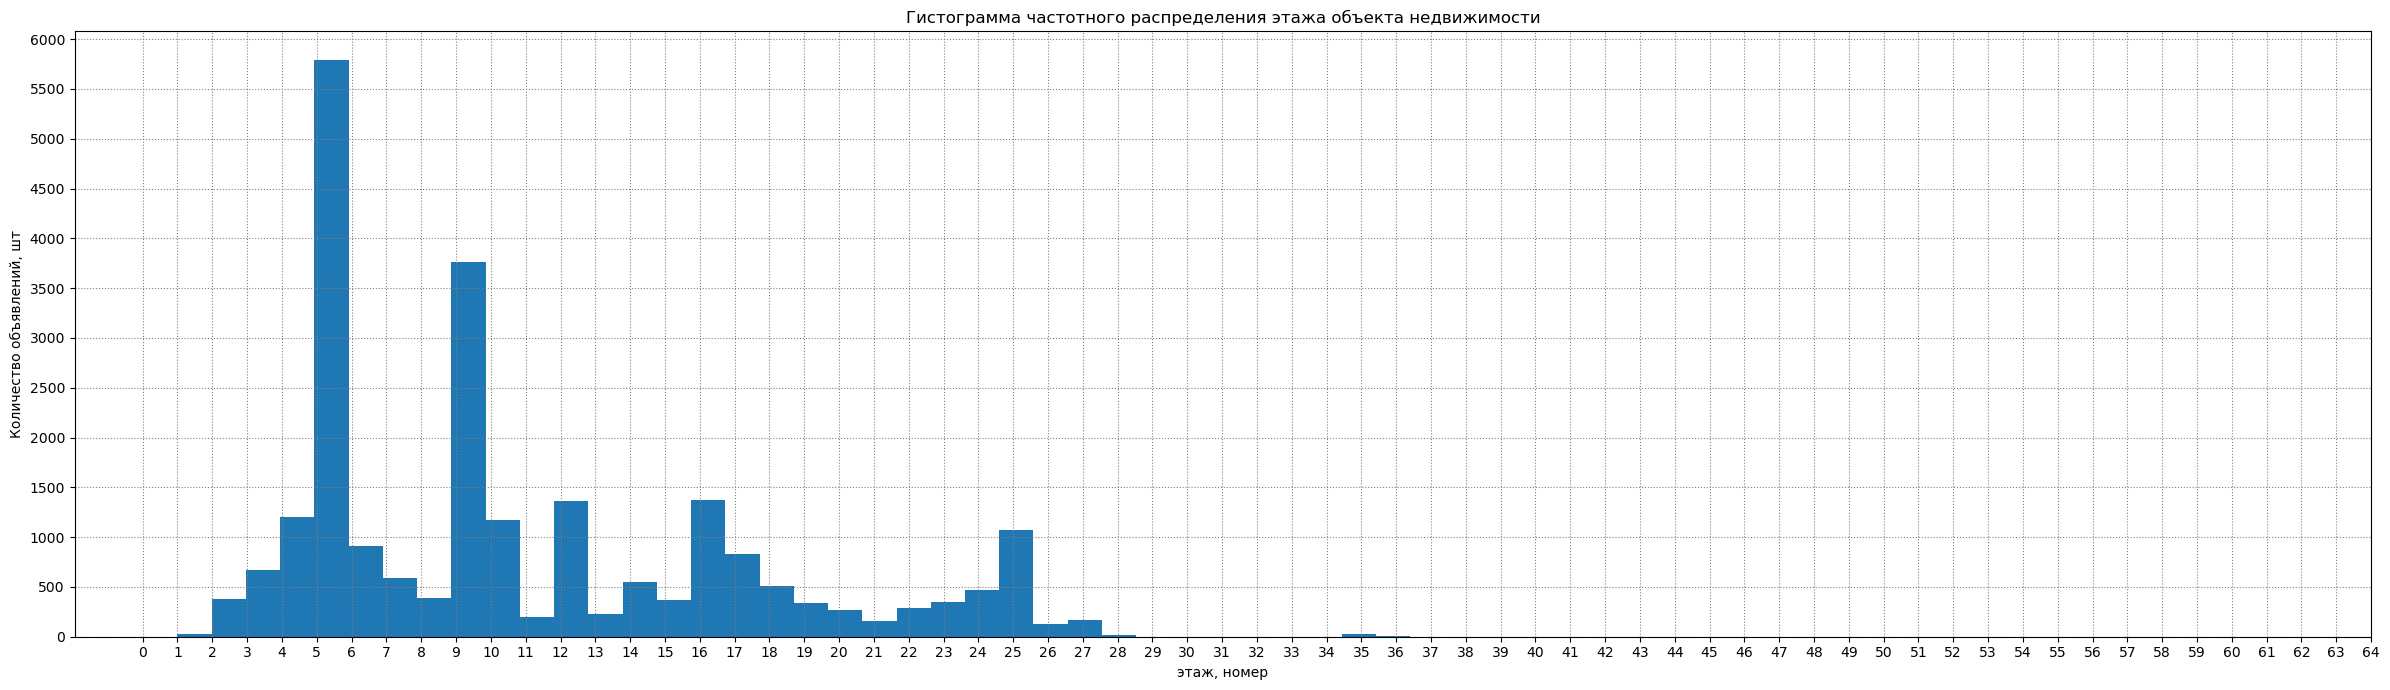

In [34]:
fig, axs = plt.subplots(1, 1,
                        figsize =(24, 7), 
                        tight_layout = True)
plt.hist(data['floors_total'], bins=60)
plt.title("Гистограмма частотного распределения этажа объекта недвижимости")
plt.xlabel("этаж, номер")
plt.ylabel("Количество объявлений, шт")
plt.xticks(np.arange(0,65,step=1))
plt.yticks(np.arange(0,6500, step=500))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Нравится, что ты закономерно шаг за шагом объясняешь наблюдаемые особенности в данных, спасибо за это 
</div>

Наиболее популярен - 5 этаж. Далее 9. Тут ещё популярность связана с предельной высотностью домов. Если, к примеру, низкоэтажных домов много, то и первые 10 этажей будут иметь большее частотное преимущество. Чтобы судить более объективно о популярности выбора этажа, нужно смотреть по категориям в зависимости от предельной высотности дома. <br>
Как ни странно, немалую популярность имеет 25 этаж. Т.е. это новые дома с видовыми квартирами. Посмотрим на тип этажа.

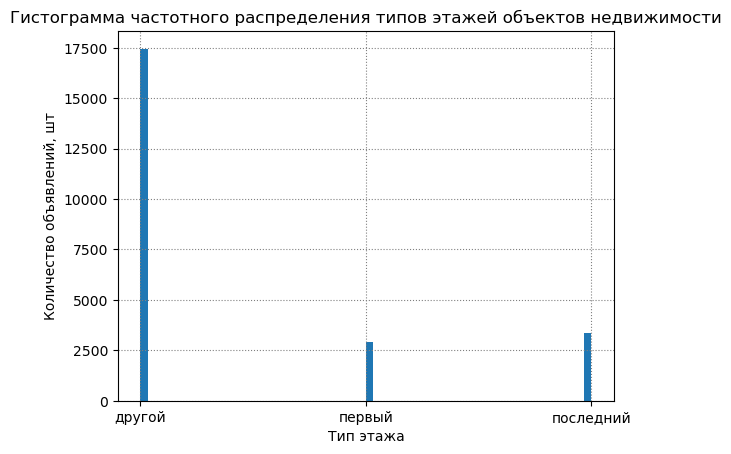

In [35]:
plt.hist(data['floor_type'], bins=60)
plt.title("Гистограмма частотного распределения типов этажей объектов недвижимости")
plt.xlabel("Тип этажа")
plt.ylabel("Количество объявлений, шт")
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

Первых и последних примерно равное количество.

In [40]:
data[(data['floor']==25) & (data['floor_type']=='последний')]

total_images   last_price  total_area first_day_exposition  rooms  \
147              10   27700000.0      179.60           2017-07-06      5   
696               1    3364930.0       34.69           2014-11-27      1   
1975             14    7000000.0       62.00           2018-09-12      2   
3166             15    4750000.0       34.40           2018-07-24      1   
4683              2    3650000.0       35.00           2018-02-01      0   
4734             10    5799000.0       60.40           2017-10-26      2   
5882             17    4700000.0       34.00           2019-02-11      1   
6161              5    3600000.0       42.00           2017-07-21      1   
7094             10    7900000.0       83.45           2017-06-05      3   
7684             14    4200000.0       45.50           2017-09-01      1   
7930             13    3895000.0       34.20           2015-07-24      1   
8793              7      12190.0      109.00           2019-03-20      2   
9594              3    8600000.0       65.00           2016-06-14      2   
10540            11    4150000.0       26.00           2016-06-19      1   
10547            13    4590000.0       36.00           2015-06-14      1   
10638            14    4800000.0       88.50           2017-09-13      3   
11101             6    2960431.0       35.40           2015-03-06      1   
11786             1    8466000.0       88.00           2018-03-23      3   
12809             7    3650000.0       38.00           2017-09-27      1   
13493             1    3250000.0       58.50           2017-11-10      1   
14332             8    6700000.0       77.00           2015-03-24      3   
14406            14    3500000.0       35.00           2018-07-26      1   
14809            17   13300000.0      101.20           2018-03-03      3   
15744             2   14000000.0      145.00           2018-02-08      5   
16364            11    3100000.0       37.00           2017-09-25      1   
16563            12    5150000.0       43.00           2017-10-05      1   
17965            20    5000000.0       37.00           2015-07-22      1   
18768             8    5999000.0       42.00           2015-10-24      1   
19426            20    4100000.0       35.90           2018-03-29      1   
19540             8  420000000.0      900.00           2017-12-06     12   
20114             5    5700000.0       54.30           2019-01-02      2   
20295             1    2900000.0       41.00           2018-02-21      1   
20760             5    5890000.0       51.90           2016-02-09      1   
20985            13    6980000.0       59.00           2018-10-05      2   
21886            12    4650000.0       38.90           2018-11-11      1   
23105             2   11000000.0      112.00           2018-03-01      4   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
147              2.85          25.0        97.20     25          True   False   
696              2.64          25.0        23.43     25          True   False   
1975              NaN          25.0        40.00     25          True   False   
3166             2.70          25.0        16.00     25          True   False   
4683              NaN          25.0        23.40     25          True   False   
4734             2.75          25.0        32.00     25          True   False   
5882             2.65          25.0        15.80     25          True   False   
6161             2.75          25.0        16.00     25          True   False   
7094              NaN          25.0        46.90     25          True   False   
7684              NaN          25.0        21.60     25          True   False   
7930              NaN          25.0        17.48     25          True   False   
8793             2.75          25.0        32.00     25          True   False   
9594              NaN          25.0        34.00     25          True   False   
10540             NaN          25.0        18.30     25     

Ага, популярность 25 этажа раскрыта - это последний этаж в новых высотных домах. К слову сказать, исходя из этого анализа видно, что популярность 25 этажа явно повышена, а стоимость квартир высока. Получается для домов такого типа последний этаж это не недостаток, а преимущество.

In [41]:
data[data['floors_total'] > 35]

total_images  last_price  total_area first_day_exposition  rooms  \
397              15   5990000.0        54.0           2018-03-22      2   
2253             12   3800000.0        45.5           2018-06-28      2   
5807             17   8150000.0        80.0           2019-01-09      2   
11079            16   9200000.0        75.0           2019-02-22      2   
16731             9   3978000.0        40.0           2018-09-24      1   
16934             5   4100000.0        40.0           2017-10-17      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
397               NaN          36.0         21.4     28          True   False   
2253             2.88          60.0         27.4      4          True   False   
5807             2.70          36.0         41.0     13          True   False   
11079            2.70          36.0         40.0     29          True   False   
16731            2.65          52.0         10.5     18          True   False   
16934            1.75          37.0         17.4      5          True   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
397        False         18.70      1.0  Санкт-Петербург           18732.0   
2253       False          7.40      0.0        Кронштадт           67763.0   
5807       False         12.00      5.0  Санкт-Петербург           18732.0   
11079      False         12.00      2.0  Санкт-Петербург           18732.0   
16731      False         14.00      0.0  Санкт-Петербург           20728.0   
16934      False          8.34      0.0  Санкт-Петербург           18732.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
397                 20444.0               0.0            NaN   
2253                49488.0               2.0          342.0   
5807                20444.0               0.0            NaN   
11079               20444.0               0.0            NaN   
16731               12978.0               1.0          793.0   
16934               20444.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_clear  \
397                 3.0           80.0             11.0     Санкт-Петербург   
2253                3.0          614.0            166.0           Кронштадт   
5807                3.0           80.0             38.0     Санкт-Петербург   
11079               3.0           80.0              NaN     Санкт-Петербург   
16731               0.0            NaN             45.0     Санкт-Петербург   
16934               3.0           80.0             71.0     Санкт-Петербург   

       squire_meter_price  publication_day  publication_month  \
397             110925.93                3                  3   
2253             83516.48                3                  6   
5807            101875.00                2                  1   
11079           122666.67                4                  2   
16731            99450.00                0                  9   
16934           102500.00                1                 10   

       publication_year floor_type  city_center_km  is_elite  
397                2018     другой            20.0     False  
2253               2018     другой            49.0     False  
5807               2019     другой            20.0     False  
11079              2019     другой            20.0     False  
16731              2018     другой            13.0     False  
16934              2017     другой            20.0     False

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Не увидел выполнение вот этого задания ![image.png](attachment:image.png)
</div>

<div class="alert alert-info"> Я его частично выполнил на базе визуализации и анализа табличных данных, которая я считал даёт мне более полную информацию. Вообще, весь пул гистограмм ещё в самом начале уже был построен. Я посчитал бессмысленным их ещё раз строить плюс гистограммы без фильтрации не особо приносят пользу. Например, гистограмма высоты потолков (одно случайное значение 100 и гистограмма нечитабельна) или гистограмма количества этажей и пр. Раз нужно чётко следовать заданию, то я добавил гистограммы по каждому из перечисленных параметров, а также оставил предыдущий разбор параметров, который я делал. Параметры, тогда, оставил как у меня были, не по порядку. Сначала потолки, потом этажи, потом площади и тд. 
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо за дополнения

</div>

In [42]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 6

Визуально просмотрим данные по этажности домов более 35 этажей. Скорее всего, такие высокия здания существуют, поэтому это не похоже на ошибку. Выбиваются только значения 52 и 60. Похоже на ошибку. Там, где этаж указан как 60 очень похоже, что ошибка. Тем более, что это не Санкт-Петербург. А в Кронштадте таких высоких зданий нет. Явно случайно напечатали лишний 0. Заменим только 60 этаж на 6 этаж. По 52 логика не прослеживается т.к. этаж в объявлении 18. Значит, здание высокое, но на сколько - не понятно. И это Санкт-Петербург, значит, возможно, что такое здание высокое существует...

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Спасибо и за этот разбор, можно было бы прогуглить какое самое высокое жилое здание в Санкт-Петербурге)

<div class="alert alert-info"> <b>Комментарий студента:</b> Ну естевенно я "прогуглил" до разбора. Но вопрос был скорее не в 35, 36 и 37-х этажах, судя по выборке, и так понятно, что это не случайность. Как раз по запросу "самое высокое жилое здание в Санкт-Петербурге" гугл выдаёт 37-этажный комплекс "Князь Александр Невский". А вопрос был скорее про 52 этаж. Когда я гуглил "самые высокие здания Санкт-Петербурга" на первом месте Лахта-центр с 87 этажами. А в нашем списке 52 этаж и стоит "is_apartment" - True т.е. это апартаменты, а не квартира. Т.е. тогда мы смотрим не жилое здание, а вообще здание. А в Питере такое нашлось. Поэтому я ничего не написал про 52 этаж и не отнёс его к ошибочным данным, потому как есть вероятность, что это могут быть апартаменты именно там. Но точно мы не знаем, но и отрицать вероятность не можем. <br>
    Если прям очень углубиться в поиск по гуглу, то ещё можно посмотреть расстояние от Лахта-центра до центра города. Гугл пишет "около 10 км", а у нас стоит цифра 13 км. Тем более ещё вероятность повышается, что это верные данные.<bR>
    Я просто прямо уж детально не углублялся в поиск и проверку каждой строчки данных, а то так с одним дата-сэтом можно месяцами ковырять. Я так быстро глянул есть-есть, ага, значит похоже на правду...Не углубляясь и не рассписывая подробности.
</div>

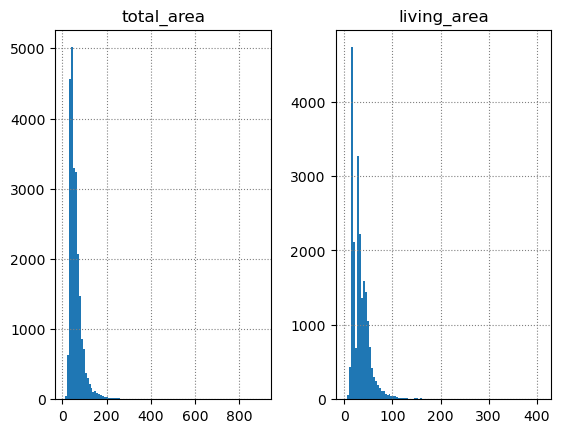

In [43]:
x = data[['total_area', 'living_area']]
x.hist(bins = 100);

Так как общая и жилая площади имеют самую высокую корреляцию, то и форма распределения гистограмм соответственно похожи.

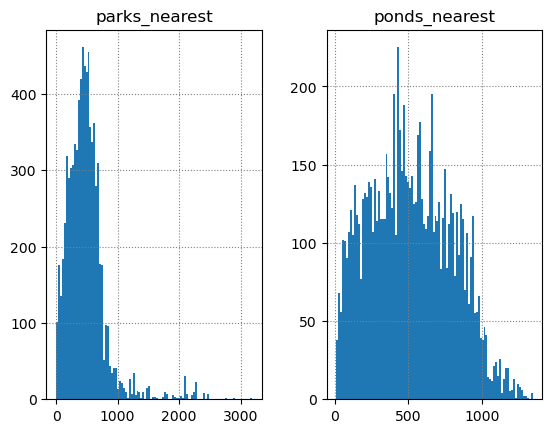

In [44]:
x = data[['parks_nearest', 'ponds_nearest']]
x.hist(bins = 100);

Пруды и парки в массе расположены в пределах одного киллометра. В среднем где-то 500 метров. Вероятно, если сильно дальше, то люди уже не пишут об этом в объявлениях.

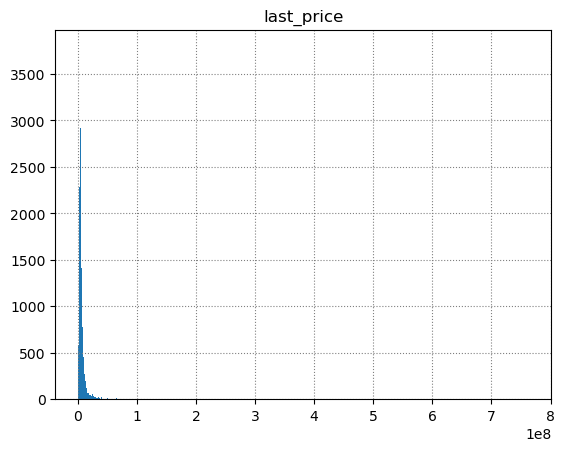

In [45]:
data.hist('last_price', bins = 1000);

Просто построение гистограммы по цене не особо информативно без фильтрации. То есть, я бы сказал, вообще не информативно. Есть, видимо, какие-то очень дорогие квартиры с 8 нулями и это не даёт увидеть картины в принципе. Я думаю, лучше начать с табличного варианта. Посмотреть всё, что дороже 100 млн. рублей и построить гистограмму без этих данных.

In [46]:
data[data['last_price'] > 1 * 10**8]

total_images   last_price  total_area first_day_exposition  rooms  \
793              20  135000000.0       310.0           2018-05-22      4   
1026             20  155000000.0       310.0           2018-10-12      5   
1188             20  118000000.0       290.6           2018-06-01      6   
1300             14  120000000.0       280.0           2018-07-12      5   
1436             19  330000000.0       190.0           2018-04-04      3   
1928             11  125000000.0       224.5           2017-01-24      4   
2243              9  130278280.0       304.0           2015-07-24      5   
2536             16  159984000.0       242.4           2015-08-27      4   
3117             19  140000000.0       631.0           2019-03-30      7   
4996             20  124000000.0       124.5           2017-10-12      4   
5893              3  230000000.0       500.0           2017-05-31      6   
7543             20  130000000.0       307.8           2016-04-24      5   
7674             20  131000000.0       380.0           2016-09-23      5   
7857             11  150000000.0       230.0           2017-10-25      8   
8900             13  190870000.0       268.0           2016-03-25      3   
12674            16  140000000.0       241.0           2015-07-24      5   
12859            20  140000000.0       631.2           2019-04-09      7   
12971            19  763000000.0       400.0           2017-09-30      7   
13749             7  240000000.0       410.0           2017-04-01      6   
13864            20  130000000.0       231.0           2015-08-13      6   
14706            15  401300000.0       401.0           2016-02-20      5   
15016             8  150000000.0       500.0           2016-01-13      4   
15651            20  300000000.0       618.0           2017-12-18      7   
16461            17  245000000.0       285.7           2017-04-10      6   
16495            12  159000000.0       260.0           2017-04-04      4   
16647            15  122000000.0       145.0           2017-04-25      3   
17912            17  135000000.0       166.0           2019-02-07      3   
19155            20  160000000.0       243.0           2018-11-12      5   
19540             8  420000000.0       900.0           2017-12-06     12   
19865            20  180000000.0       347.0           2015-01-21      8   
20264            17  119000000.0       187.6           2017-07-10      4   
20349            17  124480000.0       267.7           2016-06-18      4   
21023            17  124350000.0       248.7           2015-08-27      4   
21923            10  115490000.0       235.0           2017-04-09      5   
21955            19  130000000.0       431.0           2017-10-02      7   
22229            16  148000000.0       256.0           2016-03-16      5   
22831            18  289238400.0       187.5           2019-03-19      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
793              3.30           5.0       250.00      2          True   False   
1026             5.30           3.0       190.00      3          True   False   
1188             3.82           6.0       188.70      3          True   False   
1300             4.70           4.0       162.00      3          True   False   
1436             3.50           7.0        95.00      5          True   False   
1928              NaN           4.0       163.50      3         False   False   
2243             3.11           9.0          NaN      7          True   False   
2536             3.85           9.0       131.00      7          True   False   
3117              NaN           5.0          NaN      5          True   False   
4996             3.00           4.0        67.20      2         False   False   
5893              NaN           7.0          NaN      7          True   False   
7543              NaN           4.0       187.90      3          True   False   
7674             3.90           6.0       150.00      4         F

Всё Санкт-Петербург, часть из этих квартир мы уже отнесли в категорию элитной недвижимость, часть нет. Добавим все квартиры в категорию элитной недвижимости и выведем гистограмму без элитных квартир.

In [47]:
data.loc[data['last_price'] > 1 * 10**8, 'is_elite']=True

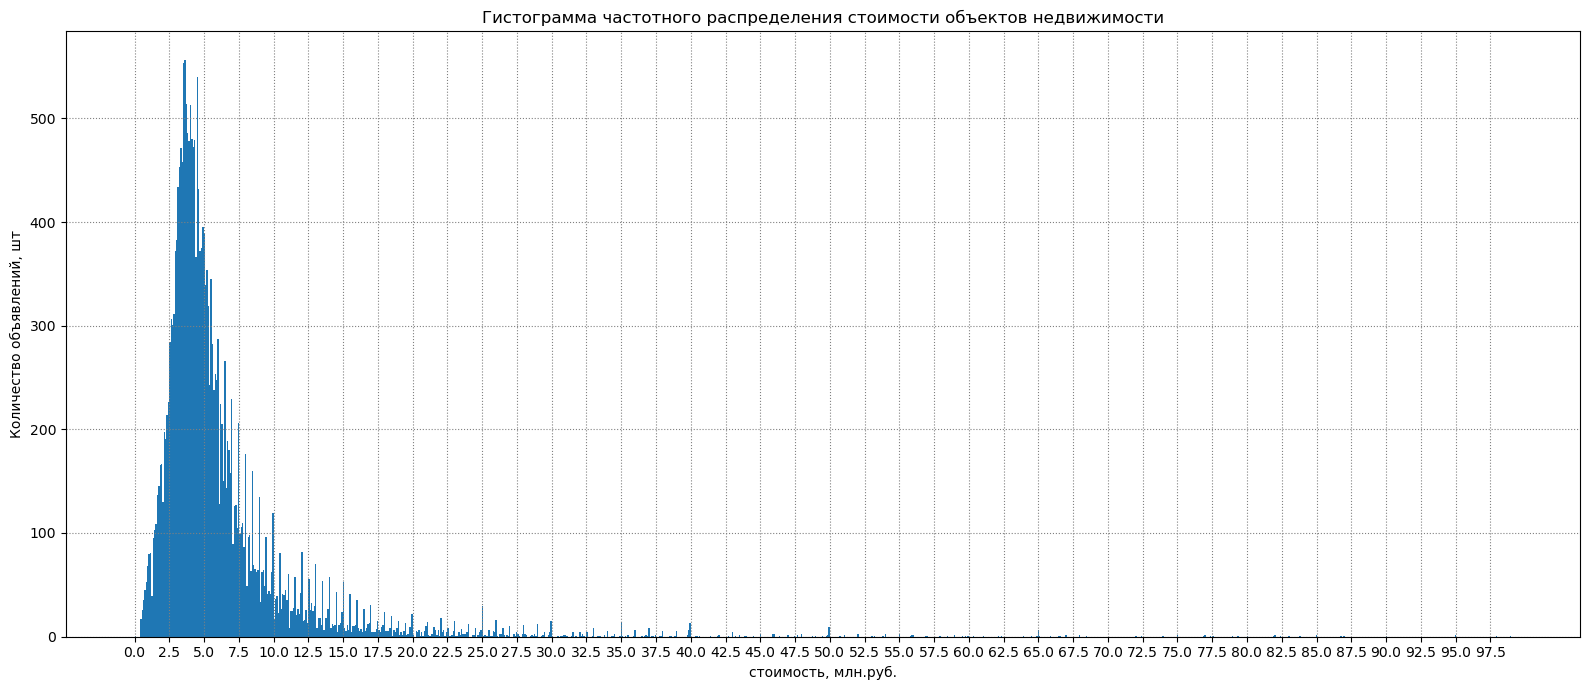

In [48]:
x = data.query('~is_elite')
fig, axs = plt.subplots(1, 1,
                        figsize =(16, 7), 
                        tight_layout = True)
plt.hist(x['last_price'] / 10**6, bins = 1000)
plt.title("Гистограмма частотного распределения стоимости объектов недвижимости")
plt.xlabel("стоимость, млн.руб.")
plt.ylabel("Количество объявлений, шт")
plt.xticks(np.arange(0,100,step=2.5))
#plt.yticks(np.arange(0,6500, step=500))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

Частотное пиковое значение где-то 3,7 млн.руб. Основная масса квартир продаётся в диапазоне 1,5 - 10,5 млн.рублей. Далее плавно по нисходящей. 

Рассмотрим частотную гистограмму распределения расстояния до центра города.

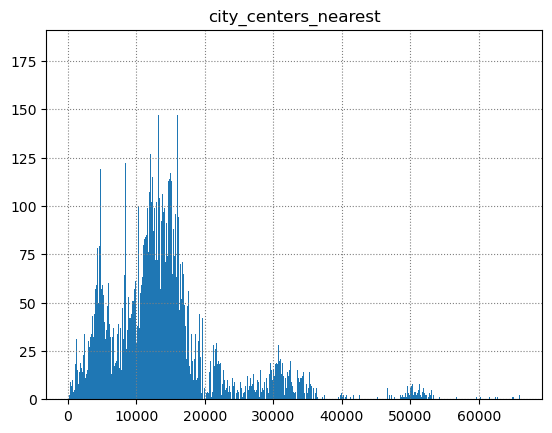

In [49]:
data.hist('city_centers_nearest', bins = 1000);

Тут явное преимущество по объявлениям из Санкт-Петербурга. Основная масса объявлений до 20км от центра. И пара всплесков по пригородам: 31 и 50 километров.

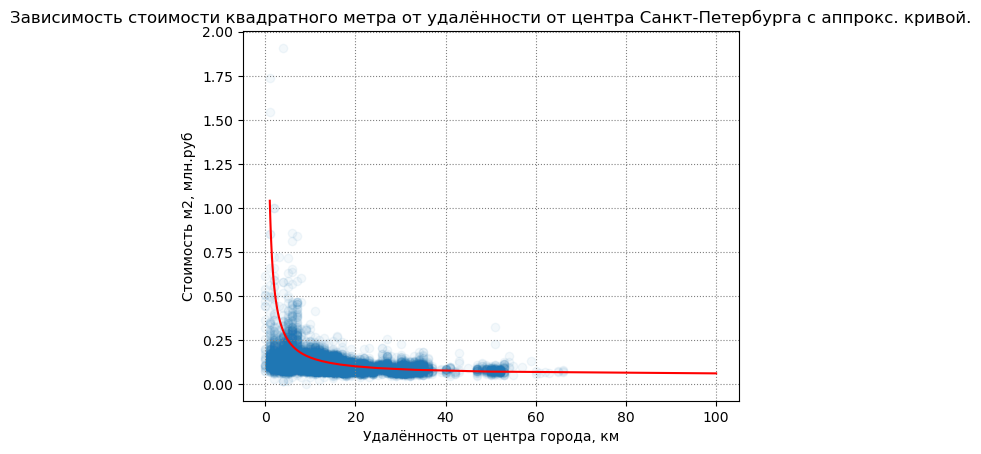

In [50]:
plt.scatter(data['city_center_km'], data['squire_meter_price'] / 1000000, alpha = 0.05)
plt.title("Зависимость стоимости квадратного метра от удалённости от центра Санкт-Петербурга с аппрокс. кривой.")
plt.xlabel("Удалённость от центра города, км")
plt.ylabel("Стоимость м2, млн.руб")
#plt.xticks(np.arange(0,20,step=1))
#plt.yticks(np.arange(0,x['squire_meter_price'].max()))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

xmin = 1
xmax = 100

xlist = [float(1/x) for x in map(lambda x: x/100.0, range(xmin,xmax))]
ylist = [float(x)+0.05 for x in map(lambda x: x/100.0, range(xmin,xmax))]
pylab.plot(xlist,ylist, color='red')
plt.show()

Основываясь на множестве, изображённом на графике, по удалённости от Санкт-Петербурга явно прослеживается гиперболическая взаимосвязь. Уравнение аппроксимирующей кривой можно выразить в следующем виде:
y=1/x+0.05, где:
 x - расстояние до центра Санкт-Петербурга
 y - стоимость средняя м2 недвижимости в млн.руб.
Основываясь на данном уравнении можно описать основную область охватывающую основное множество точек. Исходя из данного уравнения можно создать один из проверочных алгоритмов для выявления мошеннических объявлений.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А почему ты выбрал именно эту кривую для аппроксимации?) 
</div>

In [51]:
mean_price = pd.DataFrame( columns =['city_center_km', 'mean_price', 'count']) 
for a,b in data.groupby('city_center_km'):
    new_row = {'city_center_km': a, 'mean_price': b['squire_meter_price'].quantile (.75).round(0), 'count':len(b)}
    mean_price = mean_price._append(new_row, ignore_index = True)

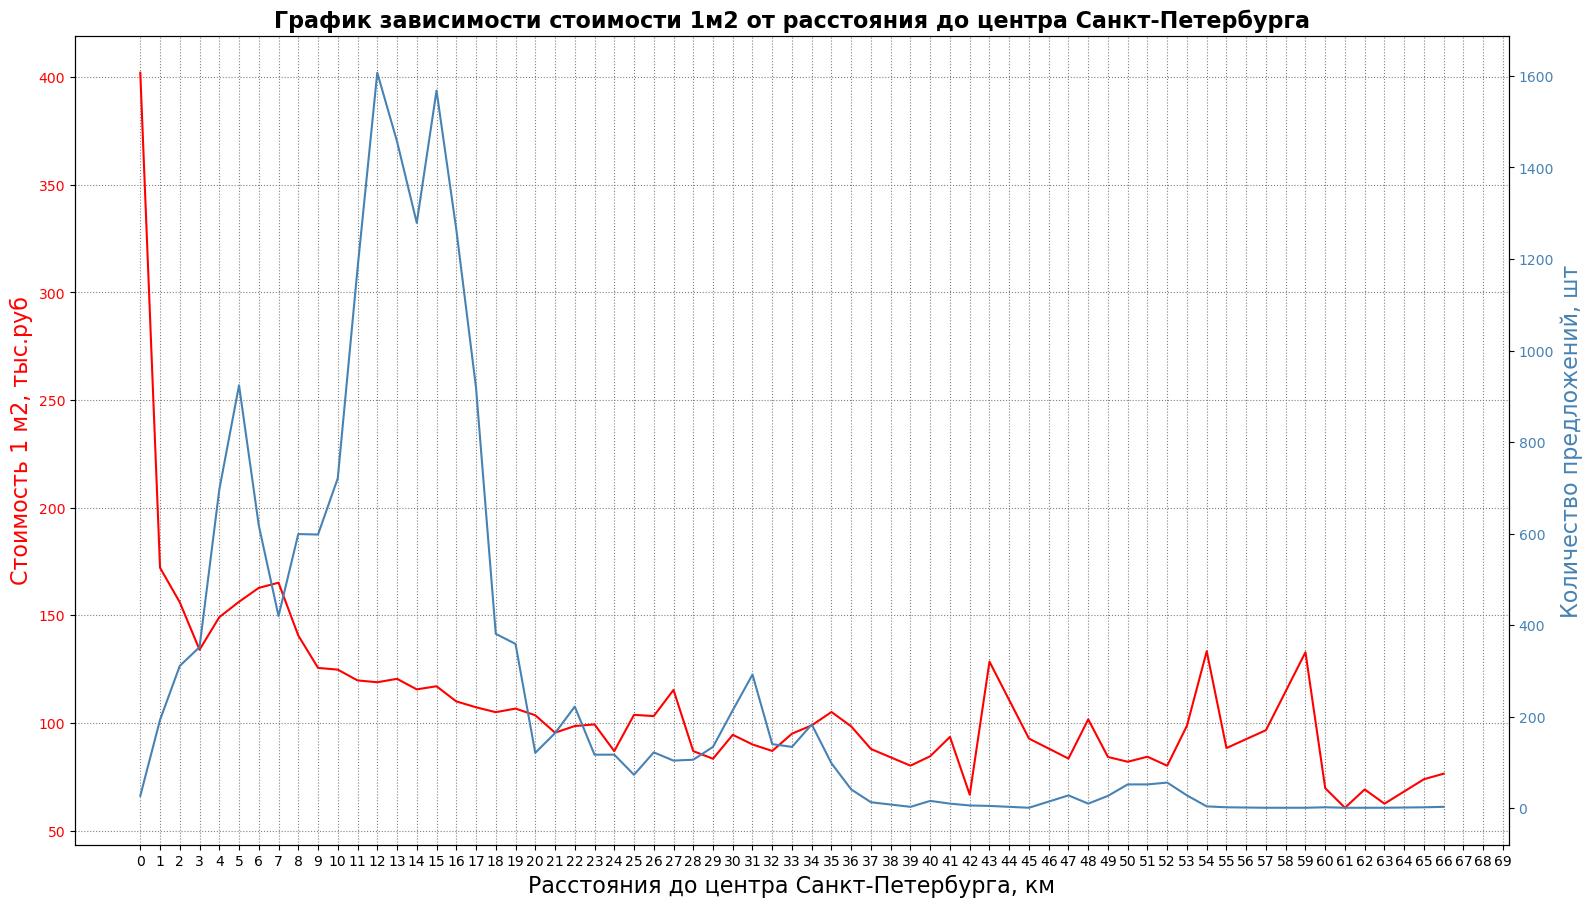

In [52]:
#define colors to use
col1 = 'red'
col2 = 'steelblue'

#define subplots
fig,ax = plt.subplots()

#define figure size
fig.set_size_inches(18.5, 10.5)

#add first line to plot
ax.plot(mean_price['city_center_km'], mean_price['mean_price'] / 1000, color=col1)


#add x-axis label
ax.set_title('График зависимости стоимости 1м2 от расстояния до центра Санкт-Петербурга', 
             fontsize = 16, fontweight ='bold') 
#add grid, tabel label
ax.grid() 
ax.set_xlabel('Расстояния до центра Санкт-Петербурга, км', fontsize= 16 )

#add y-axis label, color
ax.set_ylabel('Стоимость 1 м2, тыс.руб', color=col1, fontsize= 16 )
ax.tick_params(axis='y', labelcolor = col1)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx ()


#add second line to plot
ax2.plot(mean_price['city_center_km'], mean_price['count'], color=col2);

#add second y-axis label, color
ax2.set_ylabel('Количество предложений, шт', color=col2, fontsize= 16 )
ax2.tick_params(axis='y', labelcolor = col2)

#add x-axis range
plt.xticks(np.arange(0,70,step = 1))


plt.show()

Питер по-сути "забирает" весь основной пул предложений и чуть пригородов. Релевантная выборка до 35 километра, а дальше уже совсем мало предложений. <br>
Чтобы сильно не отвлекаться по предложениям элитной недвижимости, но и в то же время охватить основную часть выборки, посмотрим по третьему квартилю. Приведённый график зависимости цены 1 м2 недвижимости по 3-му квартилю в зависимости от расстояния до центра Санкт-Петербурга показывает, что предполагаемая кривая аппроксимации по гиперболической зависимости может неплохо отражать действительность до 40 км удаления от центра Санкт-Петербурга. Далее появляются всплески на 43, 53 и 59 километрах, нужно отдельно разбираться с их природой.

In [53]:
data[data['city_center_km'] == 43]

total_images  last_price  total_area first_day_exposition  rooms  \
2454             12  28000000.0       160.0           2016-10-24      3   
5659              2  11067416.0       160.7           2018-08-01      2   
10935            12   4500000.0        56.0           2015-10-21      3   
17162            15   6100000.0        52.5           2018-02-01      1   
19984            20   7990000.0        62.2           2018-07-29      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
2454             3.00           2.0        92.00      2          True   False   
5659             3.00           2.0          NaN      1          True   False   
10935            2.55           5.0        41.60      5          True   False   
17162            2.70           6.0        15.50      3          True   False   
19984             NaN           6.0        32.79      6          True   False   

       open_plan  kitchen_area  balcony   locality_name  airports_nearest  \
2454       False         30.00      4.0  поселок Репино           61484.0   
5659       False           NaN      0.0  поселок Репино           61451.0   
10935      False          6.00      0.0  поселок Репино           62111.0   
17162      False         21.50      0.0      Сестрорецк           61664.0   
19984      False         11.78      0.0      Сестрорецк           61872.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
2454                42583.0               0.0            NaN   
5659                42550.0               0.0            NaN   
10935               43210.0               0.0            NaN   
17162               42763.0               0.0            NaN   
19984               42971.0               0.0            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_clear  \
2454                0.0            NaN              NaN              Репино   
5659                0.0            NaN            238.0              Репино   
10935               0.0            NaN            703.0              Репино   
17162               3.0          287.0            302.0          Сестрорецк   
19984               3.0          169.0             23.0          Сестрорецк   

       squire_meter_price  publication_day  publication_month  \
2454            175000.00                0                 10   
5659             68870.04                2                  8   
10935            80357.14                2                 10   
17162           116190.48                3                  2   
19984           128456.59                6                  7   

       publication_year floor_type  city_center_km  is_elite  
2454               2016  последний            43.0     False  
5659               2018     первый            43.0     False  
10935              2015  последний            43.0     False  
17162              2018     другой            43.0     False  
19984              2018  последний            43.0     False

Посмотрим по 43 км. В Репино (первые две строчки) явно видно, что один и тот же дом, почти всё одинаково, только там, где квадратный метр в 2 раза дешевле, этаж первый. Ну и дата публикации 2016 и 2018 года соответственно. Т.е. мы имеем явную разницу по годам продажи, видимо, из-за кризиса. Ну и вдобавок, выборка становится очень маленькой. Так, что каждая дорогая квартира сразу же оказывает существенный вклад в распределение. Ну ещё вопрос, что тут смесь годов и различных посёлков и городов на одном и том же киллометраже. Посмотрим дальше, 54й километр.

In [54]:
data[data['city_center_km'] == 54]

total_images  last_price  total_area first_day_exposition  rooms  \
8862             11   5000000.0        40.0           2018-06-29      1   
18096             2   6177600.0        70.2           2015-11-10      3   
22855            16   2950000.0        31.0           2018-03-07      1   
22941             8  10965000.0        69.3           2019-01-10      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
8862              2.7           4.0         16.0      1         False   False   
18096             NaN           4.0         43.7      4         False   False   
22855             2.7           1.0         16.4      1          True   False   
22941             3.0           4.0         48.9      4          True   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
8862       False          11.5      0.0   Зеленогорск           72469.0   
18096      False           9.4      0.0   Зеленогорск           72469.0   
22855      False           5.6      0.0   Зеленогорск           73115.0   
22941      False           NaN      2.0   Зеленогорск           73391.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
8862                53568.0               2.0          574.0   
18096               53568.0               2.0          574.0   
22855               54214.0               3.0          188.0   
22941               54490.0               3.0            4.0   

       ponds_around3000  ponds_nearest  days_exposition locality_name_clear  \
8862                1.0          507.0            165.0         Зеленогорск   
18096               1.0          507.0            259.0         Зеленогорск   
22855               1.0          269.0            328.0         Зеленогорск   
22941               1.0          217.0            110.0         Зеленогорск   

       squire_meter_price  publication_day  publication_month  \
8862            125000.00                4                  6   
18096            88000.00                1                 11   
22855            95161.29                2                  3   
22941           158225.11                3                  1   

       publication_year floor_type  city_center_km  is_elite  
8862               2018     первый            54.0     False  
18096              2015  последний            54.0     False  
22855              2018     первый            54.0     False  
22941              2019  последний            54.0     False

Примерно похожая ситуация. Всего 4 элемента в выборке, первые два - один и тот же дом. Отличие цены за 1м2 в 1,5 раза, но и года продажи с разницей в 3 года. Ну и, наконец, глянем 59й километр.

In [55]:
data[data['city_center_km'] == 59]

total_images  last_price  total_area first_day_exposition  rooms  \
11244             8   4250000.0        32.0           2018-02-04      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
11244             NaN           2.0         20.0      2          True   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
11244      False           7.0      0.0   Зеленогорск           72713.0   

       city_centers_nearest  parks_around3000  parks_nearest  \
11244               59052.0               3.0          148.0   

       ponds_around3000  ponds_nearest  days_exposition locality_name_clear  \
11244               1.0          671.0             24.0         Зеленогорск   

       squire_meter_price  publication_day  publication_month  \
11244            132812.5                6                  2   

       publication_year floor_type  city_center_km  is_elite  
11244              2018  последний            59.0     False

Тут тоже Зеленогорск и всего 1 объявление за все годы.

<div style="border:solid blue 3px; padding: 5px">
<font color="black">
  Т.е. отвечая на вопрос:"А почему ты выбрал именно эту кривую для аппроксимации?" - Я бы сказал, что изначально, изучив график рассеяния данных и следуя логике, какой в принципе в России рынок т.е. всё крутится вокруг каких-то больших центров, больших городов и все стремятся селиться ближе к деловому, культурному и пр. центрам. Т.е. всё крутится вокруг работы, транспортной доступности и пр. Я хочу сказать, что в общем, такой принцип, вероятнее всего, присущ всем мегаполисам и не только в России, но, вероятно, везде есть свои особенности. В России, ввиду своих особенностей, меньшей транспортной доступности, большей концентрацией всего в центре и возникает некая такая тенденция. В той же Германии, США и пр., на сколько я знаю, распределение, наверное, более равномерное. Люди больше предпочитают загородные дома, транспортная доступность, особенно на автомобиле, выше, а распределение различных предприятий шире по территории.<br>
    Также, как мы видим из приведённого выше графика, эта теория подтверждается. При достаточном объёме выборки, в среднем, так и происходит. Где-то до 40 км удаления характер наклона кривой сохраняется. Гипербола, потому что приближаясь к центру появляется очень много элитной и котирующейся недвижимости и стоимость м2 как бы стремится в бесконечность, потом резкий спад, массивная центральная часть с огромным объёмом выборки и большим количеством различных типов домов и соответственно различной стоимостью и потом плавное снижение по удалению с падением престижности и ростом транспортной недоступности.<br>
    Понятно, что эта аппроксимация - это просто некая какая-то теоретическая кривая "обо всём и ни о чём". Т.е. если мы подробно начнём делить по годам, по типам домов, по населённым пунктам и пр., то, скорее всего, такой картины мы уже не увидим. Т.е., к примеру, взять дома панельные или "хрущёвки", которых много и в Питере и за его пределами, то этот тип квартир как уже более старые и менее котирующиеся, скорее всего, будут иметь более равномерное распределение или, наоборот, более явные всплески среди прочего среднего в более престижных районах или местах. <br>
    В общем, моя мысль такая, что чтобы что-то с какой-то вменяемой вероятностью иметь возможность прогнозировать, нужно изучать только хорошо отфильтрованные данные, которые точно будут определять некую общую тенденцию и там искать зависимости.
</font>  
</div>     

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Здесь мне понравилось, что демонстрируешь и число наблюдений, эта визуализация позволяет понять уверенность в той или иной стоимости квадратного метра
</div>

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


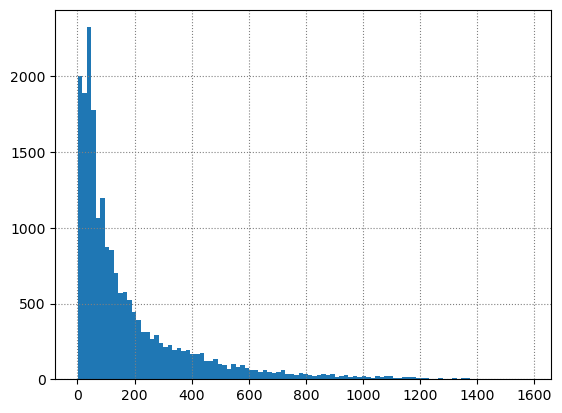

In [56]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins = 100);


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Рассмотрение значений до 100 дней подсветило бы пару интересных выбросов

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласен. Я выше уже писал об этом, что просто строить гистограммы малоинформативно. Логично их тогда сразу пачкой построить чтобы просто до анализа проглядеть. Лучше сначала провести анализ и фильтрацию, а потом построить основную часть, чтобы рассмотреть подробно то, чего на таком большом масштабе совсем не видно.</div>

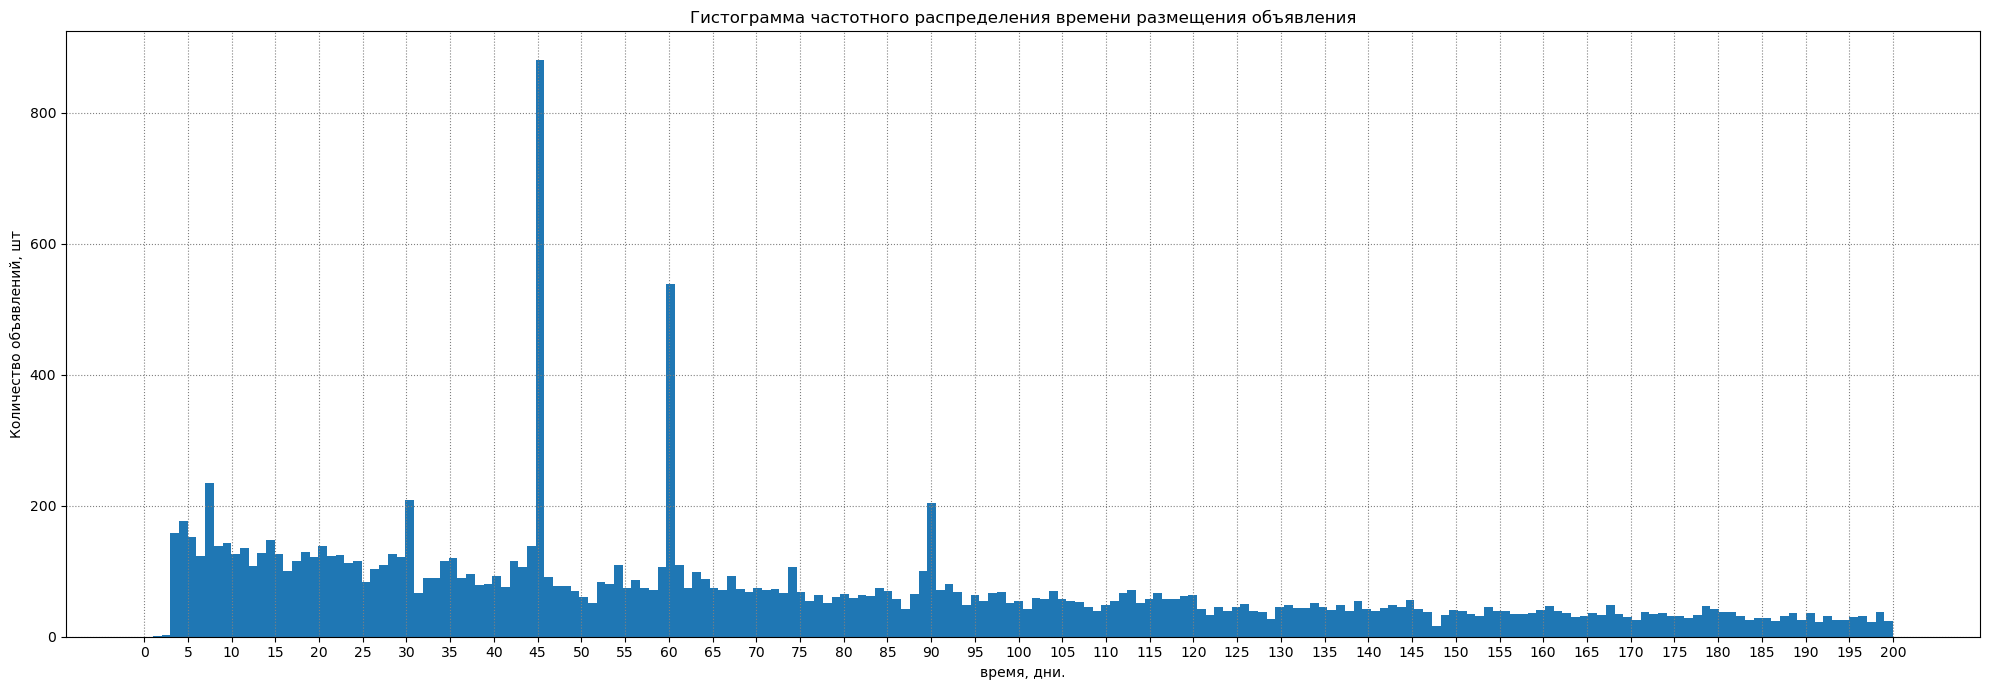

In [57]:
x = data[data['days_exposition'] <= 200]
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 7), 
                        tight_layout = True)
plt.hist(x['days_exposition'], bins=200)
plt.title("Гистограмма частотного распределения времени размещения объявления")
plt.xlabel("время, дни.")
plt.ylabel("Количество объявлений, шт")
plt.xticks(np.arange(0,205,step=5))
#plt.yticks(np.arange(0,6500, step=500))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()

Да, интересное распределение. Видно, что явные всплески 7,30,45,60,90. Вероятно, это связано с условиями размещения объявлений или подписки. Т.е. явно видно размещение на неделю (7),  на месяц (30), 1,5  месяца (45), два месяца, на 75 всплеск незначительный и потом три месяца. Тут у нас и медиана тоже 3 месяца. <br>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
И здесь звучит логично, вероятно ряд технических особенностей платформы приводят к таким выплескам в 45, 60 дней

</div>

В среднем, время прдажи квартиры в Санкт-Петербурге и Лен.области занимает 180 дней или пол года. Однако, медианное значение в 2 раза меньше - 3 месяца (95 дней). Это говорит о том, что эта величина имеет большой разброс. Кто-то продаёт очень быстро. Самое быстрое- 1 день. Кто-то продаёт годами (максимально 4 года и 4 месяца или 1580 дней).<br> 
Понятно, что на скорость продажи влияет множество факторов. Можно сказать что продажа в пределах 45-232 дня - это хороший результат. С вероятностью 95% любая квартира в Санкт-Петербурге и Лен.области будет продана за 1 год и 1 месяц или 400 дней.

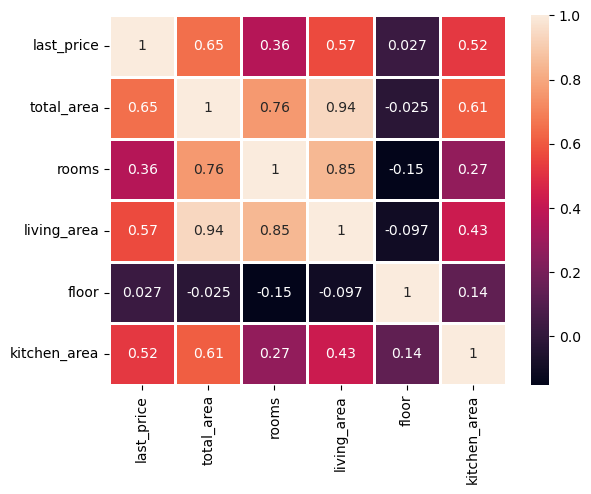

In [58]:
corr_matrix = data.loc[:, data.columns.isin(['last_price','total_area', 'living_area', 'kitchen_area', 'floor', 'rooms'])].corr()
sns.heatmap(corr_matrix, linewidth = 2, annot = True );

Рассмотрим матрицу корреляции таких параметров как общая (полная) стоимость недвижимости, общая площадь, жилая площадь, этаж, площадь кухни. Тот факт, что такие параметры как общая площадь и жилая площадь, площадь кухни и общая площадь коррелируют между собой - это очевидно. Этот же факт подтверждается и матрицей корреляции. <br>
Однако нас интересует корреляция цены и вышеперечисленных параметров. Посмотрим на первую линию. Как показывает матрица, основная корреляция с ценой у общей площади. Ничего удивительного. Менее, примерно в равных долях, с ценой коррелируют жилая площадь и площадь кухни. Тоже ожидаемо. Раз цена коррелирует с общей площадью, то и с другими площадями она в той или иной мере будет коррелировать. Ниже ещё раз рассмотрим отдельно связь цены и площади кухни.<br>
Из общих знаний известно, что эти параметры определённо влияют на цену в общем сегменте продаж. Если мы будем выделять элитную недвижимость в отдельный сегмент, то там, скорее всего, действуют уже немного другие законы и, есть вероятность, что в этом сегменте жилая площадь и площадь кухни будут иметь меньше корреляции с ценой.<br>
Далее, количество комнат коррелирует незначительно с ценой. Можно сказать, что этот фактор не особо влияет на цену.<br>
И, наконец, этаж в общем виде вообще не коррелирует с ценой. Влияние этажа на цену оценим категориально. Т.е. как влияет первый этаж на цену, последний и любой другой.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Тепловая карта - отличная визуализация, но рекомендую добавлять `linewidth`, этот параметр отвечает за ширину линии разделителя между ячейками, что делает график чуть более читаемым.
* А ещё есть параметр `annot`, который добавляет подписи ячейкам, так что отлично повышая информативность

<div class="alert alert-info"> <b>Комментарий студента:</b> 👍</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Спасибо за внедрение, повышение информативности визуализации
</div>

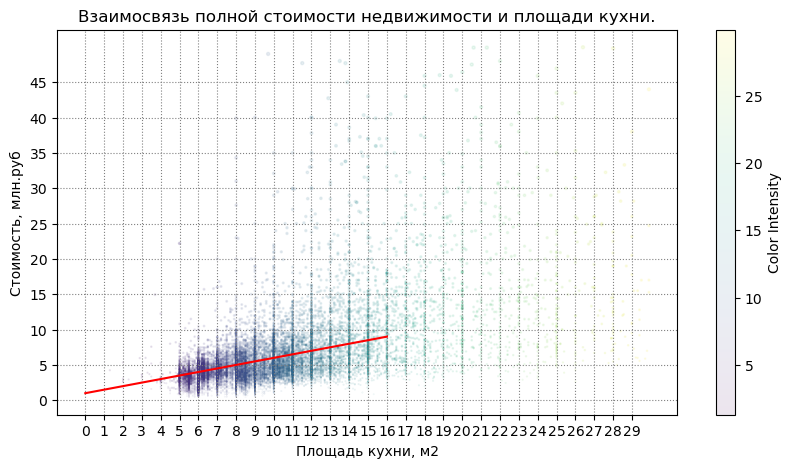

In [59]:
x = data.loc[(data['kitchen_area'] < 30) & (data['last_price'] / 1000000 < 50)]
# colors, sizes
sizes = x['last_price'] / 10000000
t = x['kitchen_area']

#figuresize
plt.figure(figsize = (10,5)) 

# Create a scatter plot
plt.scatter(x['kitchen_area'], x['last_price'] / 1000000, alpha = 0.1, s=sizes, c=t, cmap='viridis')
 
# Add title and axis labels
plt.title("Взаимосвязь полной стоимости недвижимости и площади кухни.")
plt.xlabel("Площадь кухни, м2")
plt.ylabel("Стоимость, млн.руб")

# grid and ticks
plt.xticks(np.arange(0, 30, step = 1))
plt.yticks(np.arange(0,50, step = 5))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()


 
# Display color intensity scale
plt.colorbar(label='Color Intensity')

#approximation line
xmin = 1
xmax = 10

xlist = [float(2 * x - 2) for x in range(xmin,xmax)]
ylist = [float(x) for x in range(xmin,xmax)]
pylab.plot(xlist,ylist, color = 'red')
 
# Show the plot
plt.show()


Как видно из представленной диаграммы рассеяния, есть тенденция увеличения цены от площади. Видно, что достаточно большое количество предложений в диапазоне площади кухни от 5 до 17м2 и они создают основную массу.<br>
В общем виде взаимосвязь цены и площади можно аппроксимировать как:<br>
y=2x-2, где:<br>
х - площадь кухни, м2;<br>
у - общая стоимость недвижимости в млн.руб.<br>

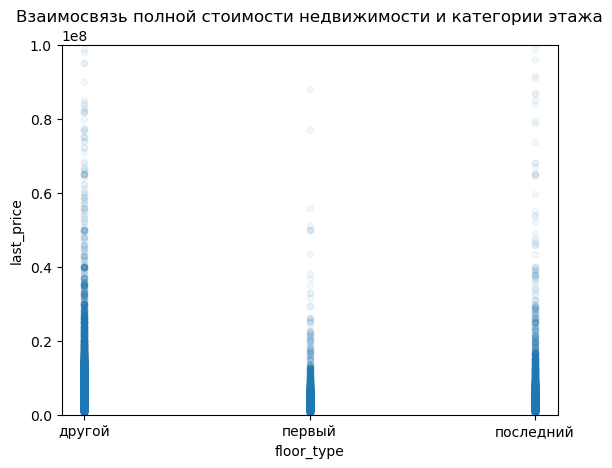

In [60]:
data.plot(y = 'last_price', x = 'floor_type', kind = 'scatter', ylim = (0, 10 * 10**7), alpha = 0.05, 
          title = 'Взаимосвязь полной стоимости недвижимости и категории этажа');

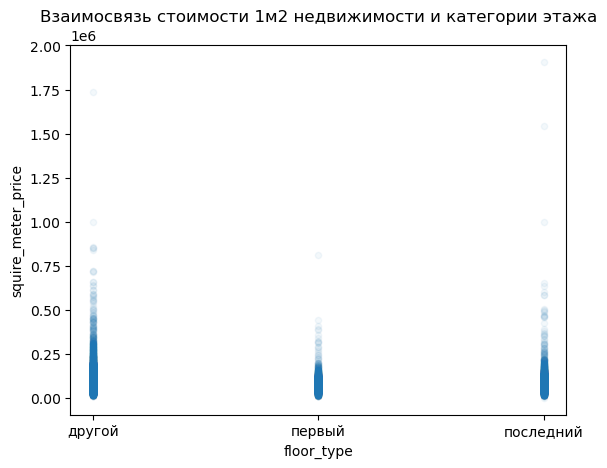

In [61]:
data.plot(y = 'squire_meter_price', x = 'floor_type', kind = 'scatter', alpha = 0.05, 
          title = 'Взаимосвязь стоимости 1м2 недвижимости и категории этажа');

Согласно представленным диаграммам рассеяния также очевидна взаимосвязь полной стоимости и категории этажа. Первый этаж - это, логично, наименее котирующийся этаж. Следующий по списку - последний. Хотя, в элитной недвижимости большие квартиры с лоджиями и пентхаусы располагаются часто на последнем этаже, но это, как я писал ранее, отдельная категория недвижимости со своими правилами. Поэтому, мы видим ценовые выбросы в категории этажа последний такие же как и в категории этажа другой.<br>
Однако, если говорить по средний сегмент, то видно, что плотность в категории последний ниже, чем в категории другой.

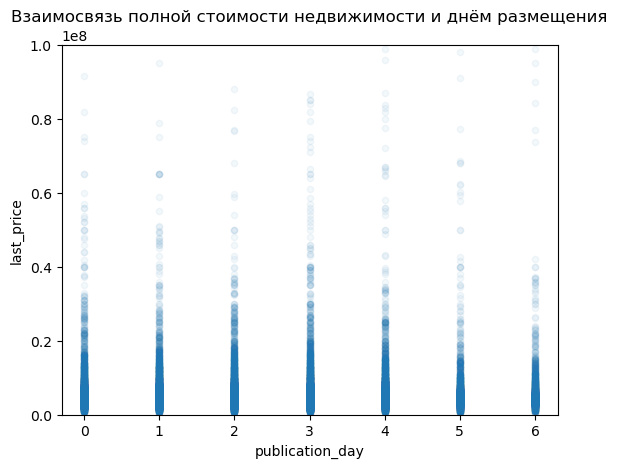

In [62]:
data.plot(y = 'last_price', x = 'publication_day', kind = 'scatter', alpha = 0.05, ylim = (0, 10 * 10**7),
          title = 'Взаимосвязь полной стоимости недвижимости и днём размещения');

В данном случае мы, очевидно, наблюдаем скорее не взаимосвязь стоимости, а деловую активность. В целом, весь диапазон стоимостей представлен по дням недели. Однако, плотность цвета падает к 5 и 6 т.е. в субботу и воскресение. Это обусловлено деловой активностью и тем, что рынок недвижимости - это профессиональный рынок. Большинство рынка занято профессиональными риэлторами, а выходные день не рабочий. Поэтому к выходным мы видим спад. Проверим это на гистограмме относительных частот.

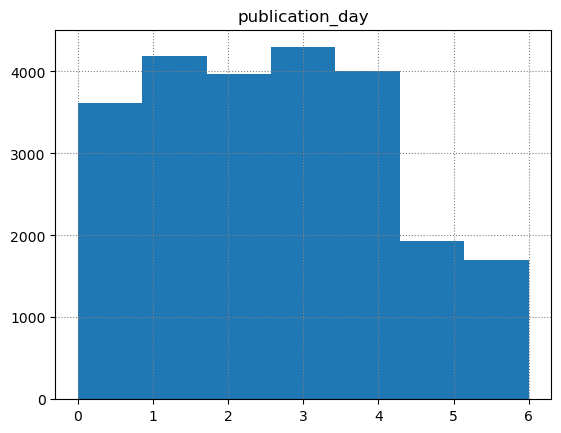

In [63]:
data.hist('publication_day',bins = 7);

Предположение оказалось верным. К выходным частота новых объявлений падает в 2 раза.

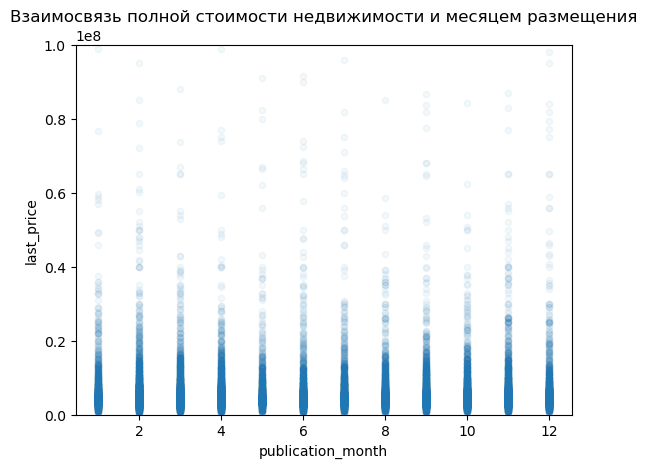

In [64]:
data.plot(y = 'last_price', x = 'publication_month', kind = 'scatter', alpha = 0.05, ylim = (0, 10 * 10**7),
          title = 'Взаимосвязь полной стоимости недвижимости и месяцем размещения');

Аналогичная история как с днём публикации. Цены от 0 до 10^8 руб. распределены по всем месяцам, но плотность меняется. Это скорее всего также взаимосвязано с деловой активностью и праздниками. Взглянем на гистограмму относительных частот.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Здесь было бы удобно использовать метод `sns.pairplot(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']])`, рекомендую

<div class="alert alert-info"> <b>Комментарий студента:</b>Ооо, спасибо!! <br>
Попробовал! Но, честно, чего-то я как-то не фанат такой визуализации...Ну, то есть в общем, с одной стороны, неплохая штука, чтобы глянуть, но, с другой стороны, очень мелко, малоинформативно и обычно детали кроются при более узком рассмотрении.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Да, для каких-то совсем уж обзорных сведений только если исопльзовать)

</div>

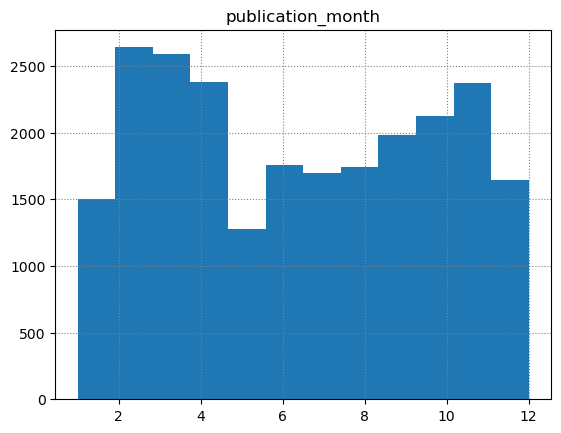

In [65]:
data.hist('publication_month', bins = 12);

Как видно из гистограммы, 1 месяц - частота ниже следующих месяцев. 1 месяц - январь. Январские праздники занимают треть месяца. Вот и частота примерно на треть меньше, чем в феврале. Далее резкое падение в 5 месяц - май. Аналогично - майские праздники. Далее летние месяцы - частота стабильна и невысока. Лето - отпуска, дача. Далее начиная с сентября - стабильный рост. И опять провал в декабре. Предпраздничная суета и опять снижение деловой активности.

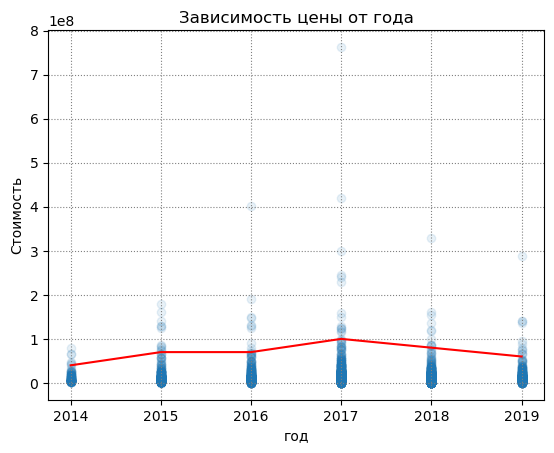

In [66]:
plt.scatter(data['publication_year'], data['last_price'], alpha = 0.1 )
plt.title("Зависимость цены от года")
plt.xlabel("год")
plt.ylabel("Стоимость")
#plt.xticks(np.arange(0,20,step=1))
#plt.yticks(np.arange(0,x['squire_meter_price'].max()))
plt.rc('grid', linestyle = ":", color = 'gray')
plt.grid()
a=[2014,2015,2016,2017,2018,2019]
b=[4 * 10**7, 7 * 10**7, 7 * 10**7, 10 * 10**7, 8 * 10**7, 6 * 10**7]
plt.plot(a,b,color='red')
plt.show()



По годам явно выраженное изменение в полной стоимости. Это связано с финансовыми показателями и экономическими факторами в стране и в мире. Очевидно прослеживается рост с 2014 года по 2017 год. Далее падение с 2017 год по 2019 год. 

    locality_name_clear  mean_squire_meter_price  count
251          Старополье                 11206.22      3


locality_name_clear  mean_squire_meter_price  count
223     Санкт-Петербург            114849.008793  15721
146              Мурино             86087.512017    590
106             Кудрово             95324.930508    472
297              Шушары             78677.364318    440
35           Всеволожск             68654.473970    398
202              Пушкин            103125.819377    369
89              Колпино             75424.579112    338
170           Парголово             90175.913089    327
43              Гатчина             68746.146515    307
36               Выборг             58141.909325    237

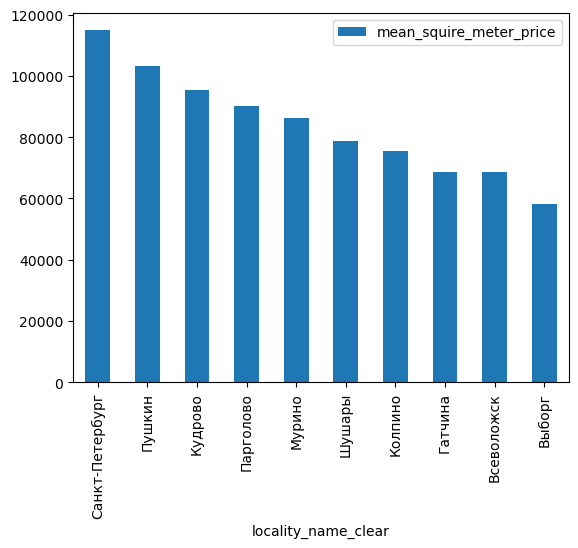

In [67]:
data_pivot_maxad = data.pivot_table(index = 'locality_name_clear', values = 'squire_meter_price', \
                                    aggfunc = ['mean', 'count']).reset_index()
data_pivot_maxad.columns = ['locality_name_clear','mean_squire_meter_price','count']
print(data_pivot_maxad.loc[data_pivot_maxad['mean_squire_meter_price'] == data_pivot_maxad['mean_squire_meter_price'].min()])
data_pivot_maxad = data_pivot_maxad.sort_values(by = 'count', ascending = False)
data_pivot_maxad = data_pivot_maxad[:10]
display(data_pivot_maxad)
data_pivot_maxad = data_pivot_maxad.sort_values(by = 'mean_squire_meter_price', ascending = False)
data_pivot_maxad.plot(x = 'locality_name_clear', y = 'mean_squire_meter_price', kind = 'bar');

При изучении топ 10 наибольшего числа объявлений был получен вышепредставленный список населённых пунктов. В лидерах Санкт-Петербург. Самая большая выборка - более 15 тысяч объявлений с 2014 по 2019 года и самая высокая средняя стоимость 1м2 жилья - почти 115 тысяч рублей за 1 м2. Завершает же топ 10 Выборг. Всего 237 объявлений за 6 лет и 58 тысяч рублей за 1м2 жилья. <br>
Самая низкая цена во всей выборке - это деревня Старополье ленинградской области. В ней просят 11 тысяч рублей за 1м2 и всего 3 предложения за 6 лет. Расстояние от деревни Старополье до центра Санкт-Петербурга составляет 171км по трассе или 2 часа 15 менут на машине.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Топ получен верно 

In [68]:
data_peter = data[data['locality_name_clear'] == 'Санкт-Петербург']
data_peter['city_center_km'].max()

29.0

In [69]:
mean_price_peter = pd.DataFrame( columns =['city_center_km', 'mean_price', 'count']) 
for x,y in data_peter.groupby('city_center_km'):
    new_row = {'city_center_km': x, 'mean_price': y['squire_meter_price'].mean().round(0), 'count':len(y)}
    mean_price_peter = mean_price_peter._append(new_row, ignore_index = True)

mean_price_peter


city_center_km  mean_price   count
0              0.0    245834.0    27.0
1              1.0    177005.0   192.0
2              2.0    157849.0   310.0
3              3.0    121387.0   350.0
4              4.0    133283.0   688.0
5              5.0    140510.0   920.0
6              6.0    151012.0   618.0
7              7.0    156177.0   420.0
8              8.0    125671.0   597.0
9              9.0    113131.0   593.0
10            10.0    112728.0   719.0
11            11.0    108631.0  1178.0
12            12.0    107489.0  1605.0
13            13.0    108148.0  1457.0
14            14.0    104252.0  1279.0
15            15.0    104232.0  1568.0
16            16.0    100543.0  1265.0
17            17.0     96598.0   883.0
18            18.0     96362.0   261.0
19            19.0     98653.0   157.0
20            20.0    103045.0    49.0
21            21.0     94470.0   117.0
22            22.0     91330.0   202.0
23            23.0     91829.0    85.0
24            24.0     85737.0    26.0
25            25.0     91531.0    26.0
26            26.0     89286.0    53.0
27            27.0    132116.0     2.0
28            28.0     81162.0     7.0
29            29.0     72953.0     6.0

Произведём ранжирование по удалённости от центра Санкт-Петербурга с шагом в 1км. Для каждой группы рассчитаем среднюю цену недвижимости и количество предложений на рынке.

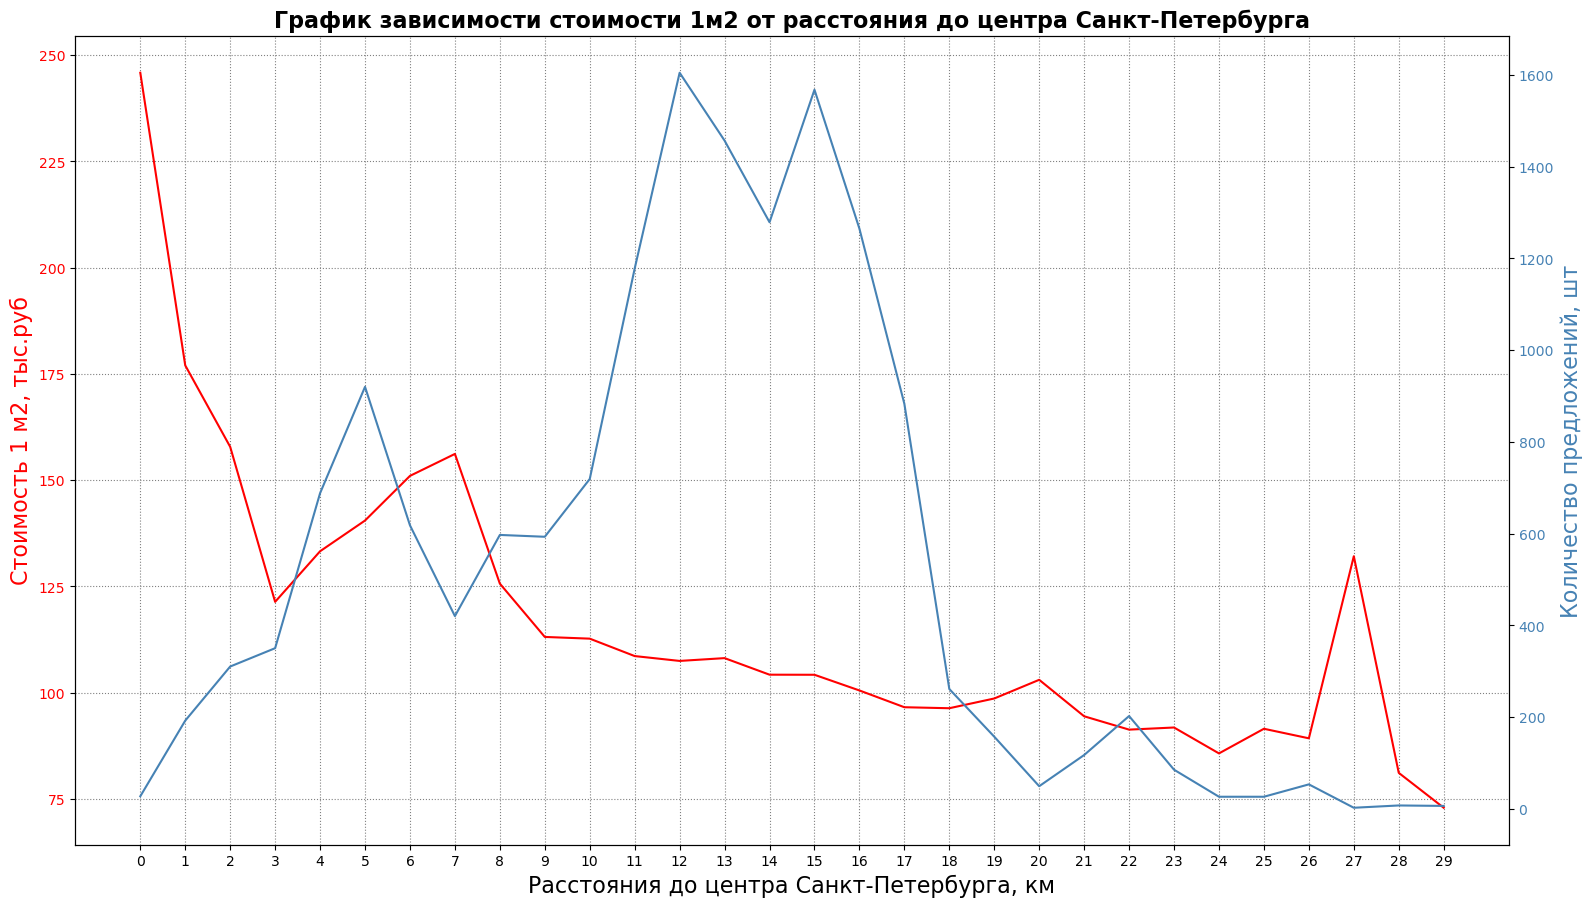

In [70]:
#define colors to use
col1 = 'red'
col2 = 'steelblue'

#define subplots
fig,ax = plt.subplots()

#define figure size
fig.set_size_inches(18.5, 10.5)

#add first line to plot
ax.plot(mean_price_peter.city_center_km , mean_price_peter.mean_price / 1000, color=col1)


#add x-axis label
ax.set_title('График зависимости стоимости 1м2 от расстояния до центра Санкт-Петербурга', 
             fontsize = 16, fontweight ='bold') 
#add grid, tabel label
ax.grid() 
ax.set_xlabel('Расстояния до центра Санкт-Петербурга, км', fontsize= 16 )

#add y-axis label, color
ax.set_ylabel('Стоимость 1 м2, тыс.руб', color=col1, fontsize= 16 )
ax.tick_params(axis='y', labelcolor = col1)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx ()


#add second line to plot
ax2.plot(mean_price_peter['city_center_km'], mean_price_peter['count'], color=col2);

#add second y-axis label, color
ax2.set_ylabel('Количество предложений, шт', color=col2, fontsize= 16 )
ax2.tick_params(axis='y', labelcolor = col2)

#add x-axis range
plt.xticks(np.arange(0,30,step = 1))


plt.show()

Как мы видим, в самом центре Санкт-Петербурга средняя цена 1м2 недвижимости максимальна. Очевидно - это элитная недвижимость в самом сердце северной столицы. Предложений не много. Далее расстояние 3-5 км от центра количество предложений резко повышается и цена тоже начинает расти. При этом, в диапазоне 3-7 км от центра пик предложение не совпадает с пиком стоимости, при этом пик стоимости приходится на снижение предложения. В данном случае это может быть объяснено сочетанием факторов:<br>
- Во-первых, по закону спроса и предложения, падение одного обуславливает рост другого;
- Во-вторых, более высокая цена и меньшее количество предложений может быть обусловлено также расположением на этом удалении более престижных районов и/или лучшим качеством предлагаемой недвижимости.</br>


Далее удаление 7-15 км - предложение резко растёт, цена 1 м2 снижается. Это основная доля предложений рынка недвижимости Санкт-Петербурга. Основной массовый сектор (масс-маркет).<br>
Удаление 15-18 км - количество предложений драмматично падает. Цена продолжает снижаться. <br>
Удаление 15-18 км - дальнейшее падение предложения, но цена чуть отыгрывает позиции. <br>
Удаление 20-22 км - небольшой рост предложений. На цену не влияет, она падает.<br>
Удаление 22-26 км - ничего примечательного. Предложений мало и их число падает. Цена одна из самых низких по Санкт-Петербургу.<br>
Удаление 26-27 км - резкий рост цены. И самое маленькое количество предложений. 27 км от центра Санкт-Петербурга, всего 2 предложения за 6 лет. Очень маленькая выборка. Цена обусловлена этими предложениями. Необходимо рассмотреть по-подробнее эти предложения чтобы разобраться в феномене.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Касательно связи с удалением от центра, возможно ещё в городе есть другие локации кроме центра города, повышающие стоимость 
* Полезная привычка смотреть сколько заведений в каждом разрезе остаётся, так часто повышения волатильности величины связано с малым числом наблюдений

<div class="alert alert-info"> <b>Комментарий студента:</b>Согласен, конечно есть. В каждом городе всегда еть более или менее престижные районы и соответственно цена от этого зависит. <br>
Согласен. Обновил график.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Ещё раз хвалю этот график!)

</div>

In [71]:
data[data['city_center_km'] == 27].head(100)

total_images  last_price  total_area first_day_exposition  rooms  \
109               2   7497600.0       62.50           2015-12-08      2   
140               8  16912000.0      105.70           2016-12-09      2   
439               9   8570000.0       72.00           2018-08-11      3   
556               0   3500000.0       28.50           2018-06-06      1   
558              13   4500000.0       65.50           2017-10-27      3   
748              13  14350000.0       74.00           2017-11-28      2   
931               8   6650000.0       69.00           2017-06-20      3   
1138              1   8000000.0       84.40           2017-08-22      3   
1675              4   3300000.0       31.00           2017-02-20      1   
1719             12   4200000.0       38.00           2018-02-12      1   
1904             14   5150000.0       50.00           2018-11-11      2   
2104             11   3150000.0       32.00           2018-02-25      1   
2409              4   1980000.0       27.00           2018-03-23      0   
2414             20  29500000.0      115.00           2017-07-21      3   
2460             15   7500000.0       78.00           2018-09-19      3   
2776              8  10500000.0      105.00           2017-12-06      4   
2929              0   5830000.0       50.00           2017-11-11      2   
2948             23  11350000.0       75.00           2017-08-15      3   
2953             13   4500000.0       61.30           2017-10-05      3   
3185             19   4700000.0       74.20           2017-11-27      4   
3575              7   3680000.0       42.00           2017-10-31      2   
3579             18   2400000.0       31.40           2017-09-15      1   
3858              8   5200000.0       56.00           2019-03-16      2   
3961             11   3500000.0       31.10           2019-03-13      1   
4400              4  12300000.0       78.65           2017-09-09      3   
4676             18   3700000.0       48.10           2018-12-18      2   
4678             11   4300000.0       59.00           2018-03-14      3   
4822             10   3100000.0       30.00           2018-09-18      1   
4842             10   3900000.0       52.40           2019-01-18      2   
4911             14   2999000.0       36.00           2018-02-12      1   
4978              8  29000000.0      228.00           2016-12-29      4   
5168              7   3650000.0       33.80           2018-01-21      1   
5261              8   3200000.0       31.60           2016-04-02      1   
5961              6   2250000.0       32.00           2018-02-27      1   
5968              1   2800000.0       31.00           2017-12-26      1   
6028              5   3350000.0       30.00           2016-06-26      1   
6079              2   3600000.0       35.20           2019-01-06      1   
6223              9   3730000.0       57.70           2017-06-02      3   
6316              5   3200000.0       30.00           2017-08-07      1   
6676             12   3300000.0       45.00           2018-07-02      2   
6872              9   6000000.0       56.50           2018-12-12      3   
7103             10   3650000.0       35.20           2018-10-15      1   
7128              8   3180000.0       30.00           2018-12-18      1   
7295             14   7950000.0       50.00           2017-07-06      1   
7555              4   4700000.0       63.00           2018-10-23      3   
7793             10   3500000.0       43.00           2018-10-05      2   
7936             20   5650000.0       48.60           2018-10-03      2   
7996             17  16600000.0      106.00           2017-12-02      4   
8213              0   2800000.0       29.54           2016-09-30      1   
8262             11   3900000.0       44.00           2019-02-14      2   
8281             17   2290000.0       31.70           2017-05-29      1   
8285              1   3550000.0       30.00           2017-11-16      1   
8466             20   4800000.0 

Итак мы видим, что на этом удалении (27 км от центра) из предложений в основном Пушкин и Металлострой. Из предложенных двух квартир в Санкт-Петербурге одна - стоимостью за 1м2 70 тысяч рублей, что явно ниже среднего значения в Санкт-Петербурге. Такая стоимость метра квадратного характерна для Металлостроя. Вероятно, эта квартира по ошибке попала в Санкт-Петербург из-за некорректного геопозиционирования либо это какая-то самая окраина, которая формально относится к Санкт-Петербургу. В любом случае, судя по таблице ранжирования количества предложений от расстояния до центра видно, что на удалении более 26 километров от центра, количество предложений очень маленькое, а выборка становится не релевантная. В дальнейшем исследовании я не буду учитывать эти данные. <br>
По второму предложению в Санкт-Петербурге на удалении 27 км цена 1м2 очень высокая - 194 тысячи рублей. Это намного выше средней цены по Санкт-Петербургу. Такая средняя стоимость присуща лишь элитным квартирам в самом центре. Вероятно, неверная геолокация. Добавим эту квартиру в список элитных.

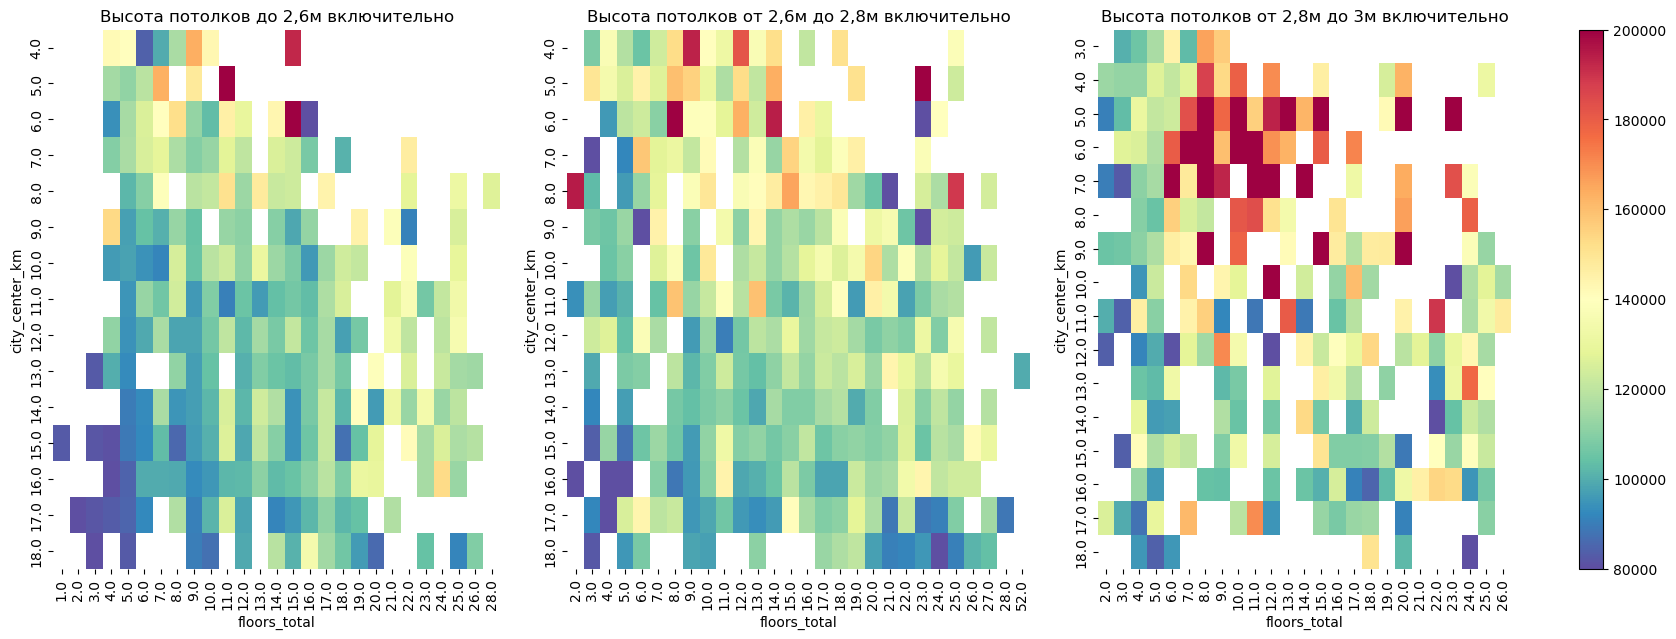

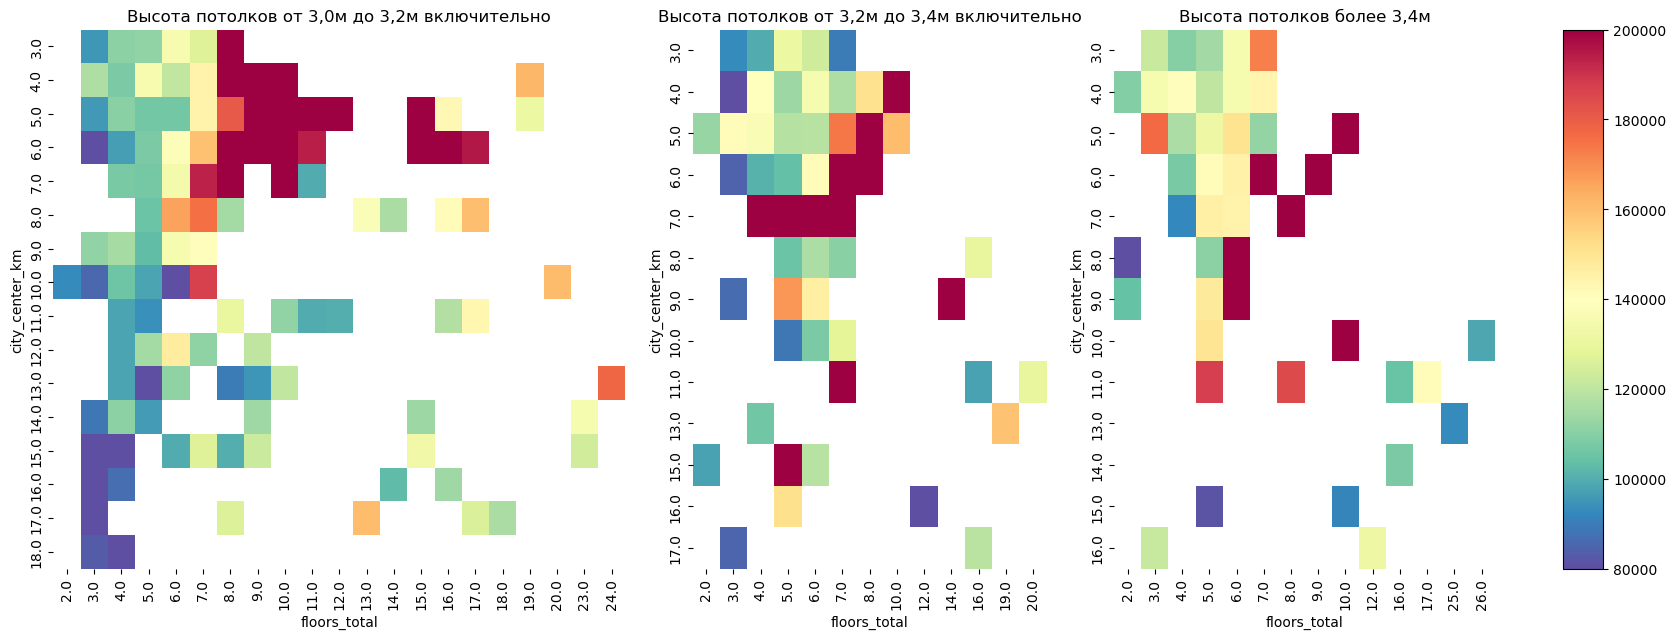

In [73]:
x = data[(data['ceiling_height'] <= 2.6) & (data['city_center_km']>3) & (data['city_center_km'] <= 18)]
y= data[(data['ceiling_height'] > 2.6) & (data['ceiling_height'] <= 2.8) & (data['city_center_km']>3) \
         & (data['city_center_km'] <= 18)]
z = data[(data['ceiling_height'] > 2.8) & (data['ceiling_height'] <= 3.0) & (data['city_center_km']>=3) \
         & (data['city_center_km'] <= 18)]

x = x.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values='squire_meter_price', aggfunc='mean')
y = y.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values='squire_meter_price', aggfunc='mean')
z = z.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values='squire_meter_price', aggfunc='mean')

dfs = [x,y,z]


x= data[(data['ceiling_height'] > 3.0) & (data['ceiling_height'] <= 3.2) & (data['city_center_km']>=3) \
        & (data['city_center_km'] <= 18)]
y = data[(data['ceiling_height'] > 3.2) & (data['ceiling_height'] <= 3.4) & (data['city_center_km']>=3) \
         & (data['city_center_km'] <= 18)]
z = data[(data['ceiling_height'] > 3.4) & (data['city_center_km']>=3) \
        & (data['city_center_km'] <= 18)]

x = x.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')
y = y.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')
z = z.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')

dfm = [x,y,z]

widths = [len(d.columns) for d in dfs]
fig, axes = plt.subplots(figsize=(20, 7), ncols=4,
                         gridspec_kw={'wspace': 0.2, 'width_ratios': widths + [1.5]})

for title, ax, dfi, in zip(['Высота потолков до 2,6м включительно','Высота потолков от 2,6м до 2,8м включительно',\
                            'Высота потолков от 2,8м до 3м включительно'],axes[:len(dfs)], dfs):
    sns.heatmap(dfi, ax =ax, cbar = False, cmap = 'Spectral_r', vmax = 200000, vmin = 80000)
    ax.set_title(title)

fig.colorbar(axes[2].collections[0], cax = axes[-1])

plt.show()

widths = [len(d.columns) for d in dfm]
fig, axes = plt.subplots(figsize = (20, 7), ncols=4,
                         gridspec_kw = {'wspace': 0.2, 'width_ratios': widths + [1.5]})

for title, ax, dfi, in zip(['Высота потолков от 3,0м до 3,2м включительно','Высота потолков от 3,2м до 3,4м включительно',\
                            'Высота потолков более 3,4м'],axes[:len(dfs)], dfm):
    sns.heatmap(dfi, ax = ax, cbar = False, cmap = 'Spectral_r', vmax = 200000, vmin = 80000)
    ax.set_title(title)

fig.colorbar(axes[2].collections[0], cax = axes[-1])

plt.show()


<div style="border:solid black 3px; padding: 5px">
<font color="black">
<b>Промежуточный вывод:</b><br>
Как было установлено выше, на стоимость 1м2 жилья значительное влияние оказывает тип дома и удалённость от центра Санкт-Петербурга. В отсутствии прямых данных о типе домов было сделано предположение о возможности использования косвенных признаков для определения типа дома, таких как высота потолков и этажность дома. На основании этих данных было проведено исследование и установлена взаимосвязь. Выборка для проведения исследования была определена на основании линейного графика, на котором продемонстрированно, что основная часть выборки данных о недвижимости в Санкт-Петербурге представляют собой данные с удалением недвижимости на расстояние 3-18 км от центра. <br>
Представленные выше тепловые карты демонстрируют зависимость стоимости 1м2 недвижимости от расстояния до центра в километрах и этажности дома для разных высот потолков. <br><br>
<b>При изучении тепловых карт выявлено:</b><br>
  1. Стоимость увеличивается по мере приближения к центру - это характерно для всех видов жилья, но в домах, где высота потолков больше - стоимость 1м2 выше и на большем удалении от центра.<br>
  2. На первых двух тепловых картах видно, что "теплота" движется от левого нижнего угла к правому верхнему. Т.е. тут подтверждаются два предположения:<br>
  - О влиянии близости к центру на стоимость 1м2;<br>
  - О новизне дома и типе дома т.е. дома с большим количеством этажей новее, а значит котируются выше.<br>
  3. На третьей тепловой карте также верны утверждения из п.2 плюс на карте видно, что стоимость квадратного метра тут уже больше во всех диапазонах.<br>
  4. На последних трёх тепловых картах количество данных уменьшается. При высоте потолков от 3,2 метров отсутствует часть данных с правой части карты. Это значит, что высотных домов с такой высотой потолков почти нет. Данные представлены преимущественно домами до 10 этажей. Это является характеристикой более старых домов с высокими потолками.<br>
  5. На четвёртой тепловой карте с высотой потолков от 3 до 3,2 метров присутствуют и высотные дома. Высока вероятность, что это новые и более престижные дома, что также подтверждается и стоимостью 1м2.</div>

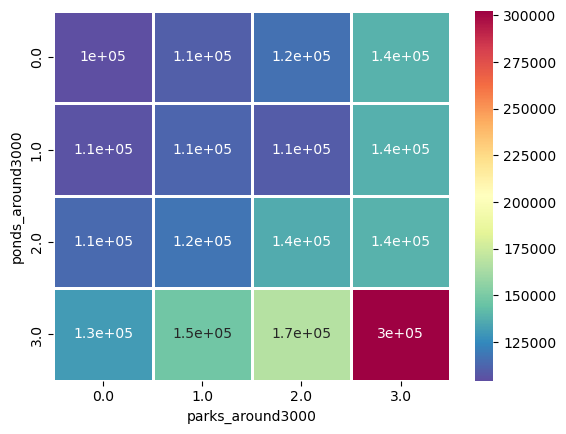

In [74]:
x = data[(data['city_center_km']>3) & (data['city_center_km'] <= 25)]
x = x.pivot_table(index = ['ponds_around3000'], columns = ['parks_around3000'], values='squire_meter_price', aggfunc='mean')
sns.heatmap(x, cmap="Spectral_r", linewidth = 2, annot = True);

Также посмотрим влияние количества парков и прудов. Ну тут очевидно. Больше парков, больше прудов поблизости - цена растёт.

In [75]:
x = data[(data['city_center_km'] > 2) & (data['city_center_km'] <= 25) & (data['parks_around3000'] == 3) \
         & (data['ponds_around3000'] == 3)]
x

total_images   last_price  total_area first_day_exposition  rooms  \
1762              7    8400000.0        91.7           2016-03-31      4   
2910             10    7100000.0        82.0           2017-01-22      3   
3161              1    9000000.0       101.0           2018-03-20      4   
4839             20   43000000.0       172.0           2018-09-04      3   
5084             12   12000000.0        85.0           2015-09-04      2   
5534             17   87000000.0       283.0           2018-11-02      5   
6991              7   24821600.0        81.7           2017-12-16      2   
7893             11    8900000.0       105.0           2015-01-14      2   
12674            16  140000000.0       241.0           2015-07-24      5   
14424             1   14500000.0        91.4           2019-05-03      3   
14480             5   10500000.0        85.0           2018-02-09      2   
14603            12   13490000.0       100.6           2018-07-31      7   
15016             8  150000000.0       500.0           2016-01-13      4   
15726             7   77349000.0       135.7           2017-12-16      3   
15999            16    8500000.0        84.0           2016-03-15      5   
16157            17   15000000.0        91.9           2018-03-27      3   
16461            17  245000000.0       285.7           2017-04-10      6   
17213             6   52000000.0       134.0           2017-09-28      3   
18443            19    9500000.0        97.0           2017-08-31      2   
18770            20   49000000.0       125.0           2019-01-29      3   
20008             8    5400000.0        31.0           2018-02-21      1   
21236            15    9020000.0        57.2           2018-03-16      1   
21449            17    8300000.0        69.6           2017-09-13      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
1762             3.57           5.0        69.60      3          True   False   
2910             3.00           6.0        56.00      4         False   False   
3161             3.00           7.0        68.60      7          True   False   
4839             3.10           8.0       110.00      6          True   False   
5084             2.71           5.0        34.30      3          True   False   
5534             3.40           5.0       177.00      5          True   False   
6991              NaN           7.0          NaN      3          True   False   
7893             3.60           6.0        30.00      6         False   False   
12674            3.00           5.0          NaN      4          True   False   
14424            3.00           5.0        50.50      3         False   False   
14480            2.70           5.0          NaN      3          True   False   
14603             NaN           4.0          NaN      2          True   False   
15016            3.20           7.0          NaN      7          True   False   
15726             NaN           7.0          NaN      5          True   False   
15999            3.20           6.0        66.50      6         False   False   
16157            3.10           5.0        68.00      5          True   False   
16461            3.35           7.0       182.80      4          True   False   
17213            3.40           8.0        63.00      4          True   False   
18443            3.07           4.0        46.75      2          True   False   
18770            2.91           6.0        73.90      6          True   False   
20008            2.75           9.0        20.00      5          True   False   
21236            2.75           9.0        30.20      9          True   False   
21449            3.55           5.0        47.00      4          True   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1762       False           5.6      0.0  Санкт-Петербург           24294.0   
2910       False           9.0      0.0  Санкт-Петербург           19555.0   
316

Посмотрим, что у нас за недвижимость, где есть 3 парка и 3 пруда на удалении до 3-х километров.<br>
Мы видим нижеследующие характеристики жилья:<br>
- Высокие потолки
- Общая этажность 5-9 этажей
- Расстояние до аэропорта 20-33км
- Расстояние до центра 3 либо 6, 3 значения - 15.<br>
Откроем карту Санкт-Петербурга и посмотрим, что это могут быть за районы.
1. Более удалённые от центра города (15км), но при этом аэропорт ближе и много парков и прудов. Судя по карте это может быть либо Московский район либо Фрунзенский район. Тоже являются престижными районами в Санкт-Петербурге.
2. Ближе к центру (3-6км), аэропорт дальше. Значит это районы центральные слева по карте (выше), севернее Большой Невы. Районы Петроградский, Выборгский, Калининский. Также спрос на эти районы повышенный.

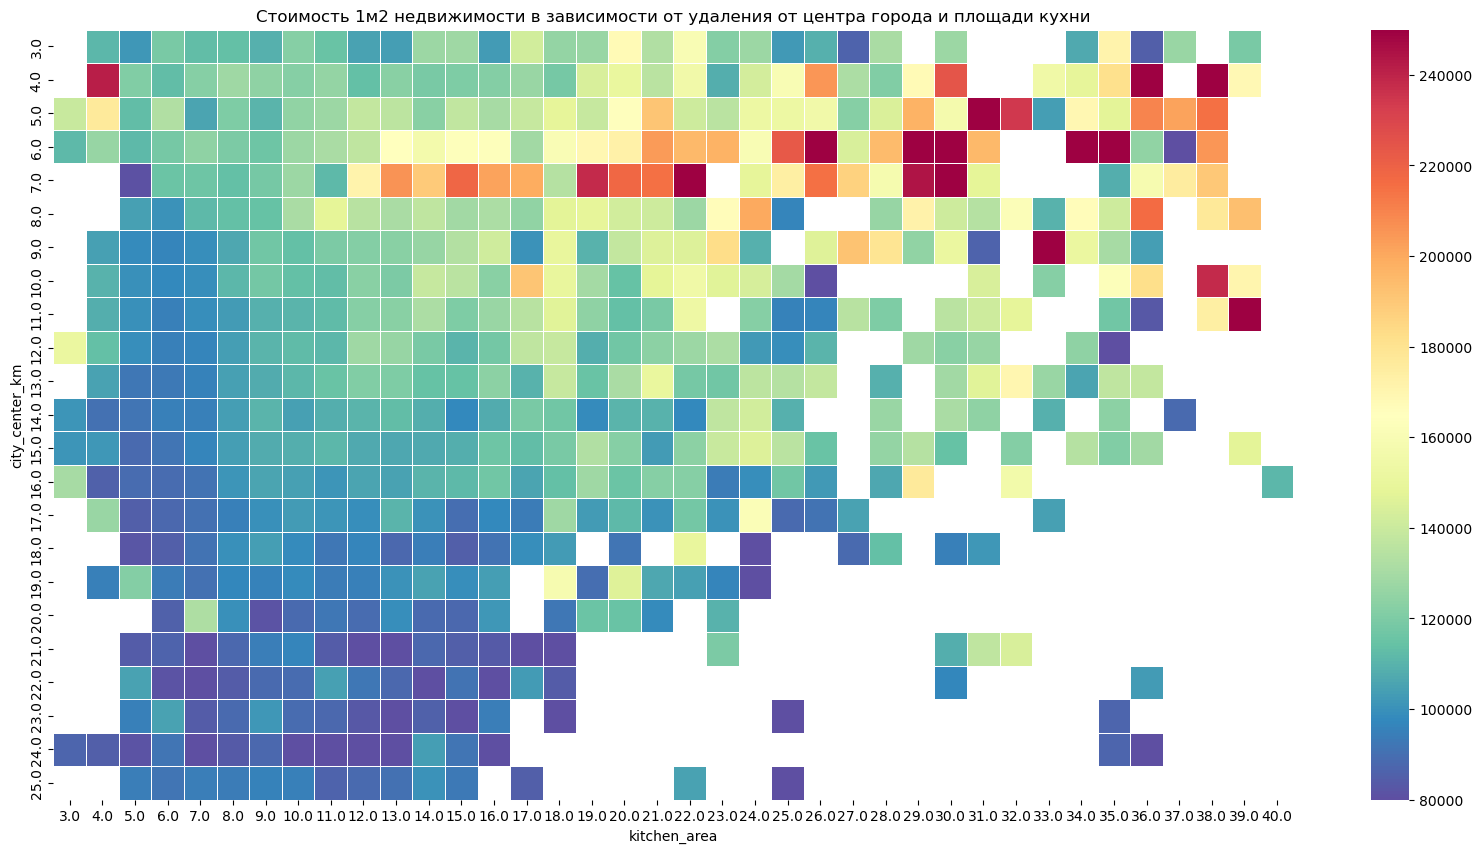

In [76]:
x = data[(data['kitchen_area'] >= 3) & (data['kitchen_area'] < 40) & (data['city_center_km'] >= 3) & (data['city_center_km'] <= 25)]
x = x.round(0)
x = x.pivot_table(index = ['city_center_km'], columns = ['kitchen_area'], values='squire_meter_price', aggfunc='mean')

#define figure size
fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(x, cmap = "Spectral_r", cbar = True, linewidth = 0.5, vmin = 80000, vmax = 250000)
ax.set_title('Стоимость 1м2 недвижимости в зависимости от удаления от центра города и площади кухни')

plt.show()



Картина достаточно интересная. Можно скзать, что:
1. Далеко от центра домов с большими кухнями нет;
2. Сохраняется тенденция, что ближе к центру квадратный метр дорожает, однако, здесь также видно и кое-что интересненькое:
- Явно выделяется 6й, 7й километр. Видно, что тут дома с большими кухнями и цена метра квадратного сразу сильно растёт.
- Также немного пятый километр. <br>
Судя по площадям кухонь, здесь явно новые дома и, вероятно, это также престижный район.

In [77]:
data[(data['city_center_km'] == 7) & (data['kitchen_area'] > 12) & (data['squire_meter_price'] > 200000)]

total_images   last_price  total_area first_day_exposition  rooms  \
51                7   45000000.0      161.00           2017-10-17      3   
263              12   39900000.0      140.60           2016-11-19      2   
464              15   66571000.0      280.30           2015-06-11      6   
674              11   50000000.0      131.10           2019-02-11      4   
793              20  135000000.0      310.00           2018-05-22      4   
1254              1   36001900.0      142.30           2017-08-25      3   
1378             16   15990000.0       58.50           2016-11-01      2   
1808             19   59914124.0      274.65           2017-07-10      6   
1846             17   15093000.0       66.20           2016-06-20      1   
3000              1   19370000.0       90.30           2018-02-01      2   
3030              5   15884000.0       72.20           2017-03-04      2   
3116             19   37000000.0      172.00           2017-11-12      4   
3527             17   37272000.0      100.60           2016-06-26      3   
4074             17   12750000.0       56.60           2016-05-12      1   
4464              2   13500000.0       54.50           2016-03-29      1   
6413             17   27420000.0      109.20           2016-06-14      3   
7049             17   32260000.0      111.90           2016-06-15      3   
7557             12   52000000.0      131.10           2019-02-11      3   
8166             17   20632000.0       76.50           2016-06-24      2   
8261             20   36000000.0      123.20           2018-01-14      1   
8275              4   29375000.0      130.21           2016-02-04      3   
8562             20   26990000.0      109.30           2018-09-17      3   
9634              4   59534892.0      172.40           2016-04-02      4   
10180            17   19471000.0       85.40           2016-06-09      3   
10267             5   23169000.0       94.90           2017-11-26      2   
10294             2   52000000.0      257.00           2018-11-12      7   
10624            19   55969724.0      181.00           2017-07-10      4   
10812            20   36700000.0      162.00           2019-05-01      4   
11263             5   22200000.0       77.00           2017-06-05      2   
11336            14   72375000.0      169.30           2015-06-18      4   
11381            13   39900000.0      160.00           2017-02-20      3   
11430            20   85000000.0      145.70           2018-08-16      3   
11481             9   25800000.0      127.21           2017-07-01      3   
11747             5   39773280.0      136.00           2018-06-15      4   
11912            20   66500000.0      147.20           2016-05-13      3   
12045             1   86738800.0      190.00           2015-09-24      5   
12223            20   59000000.0      127.50           2017-01-24      4   
12240            14   28000000.0      100.10           2016-10-01      3   
14194             2   33415200.0      140.40           2019-03-31      3   
14694            20   31750000.0      124.50           2016-05-16      3   
15738            17   34551000.0      103.20           2016-06-18      4   
16562            17   35107000.0       99.88           2016-06-23      3   
16647            15  122000000.0      145.00           2017-04-25      3   
16869             3   68500000.0      160.00           2016-06-18      4   
17006            19   18800000.0       76.80           2015-06-04      2   
17081             2   30891300.0      122.10           2019-03-31      3   
17398            19   65138176.0      169.30           2014-12-09      4   
18273            13   28114000.0      114.55           2017-07-26      4   
18554            17   42738000.0      131.10           2016-06-11      3   
18890             6   24000000.0       81.30           2016-06-24      2   
19151             9   63900000.0      140.80           2017-07-13      3   
20349            17  124480000.0      267.70           

Теперь фильтруем датасет по этим параметрам, открываем и смотрим. Ага, расстояние до аэропорта 25-33 км, а это престижные районы Санкт-Петербурга: Приморский и Выборгский.

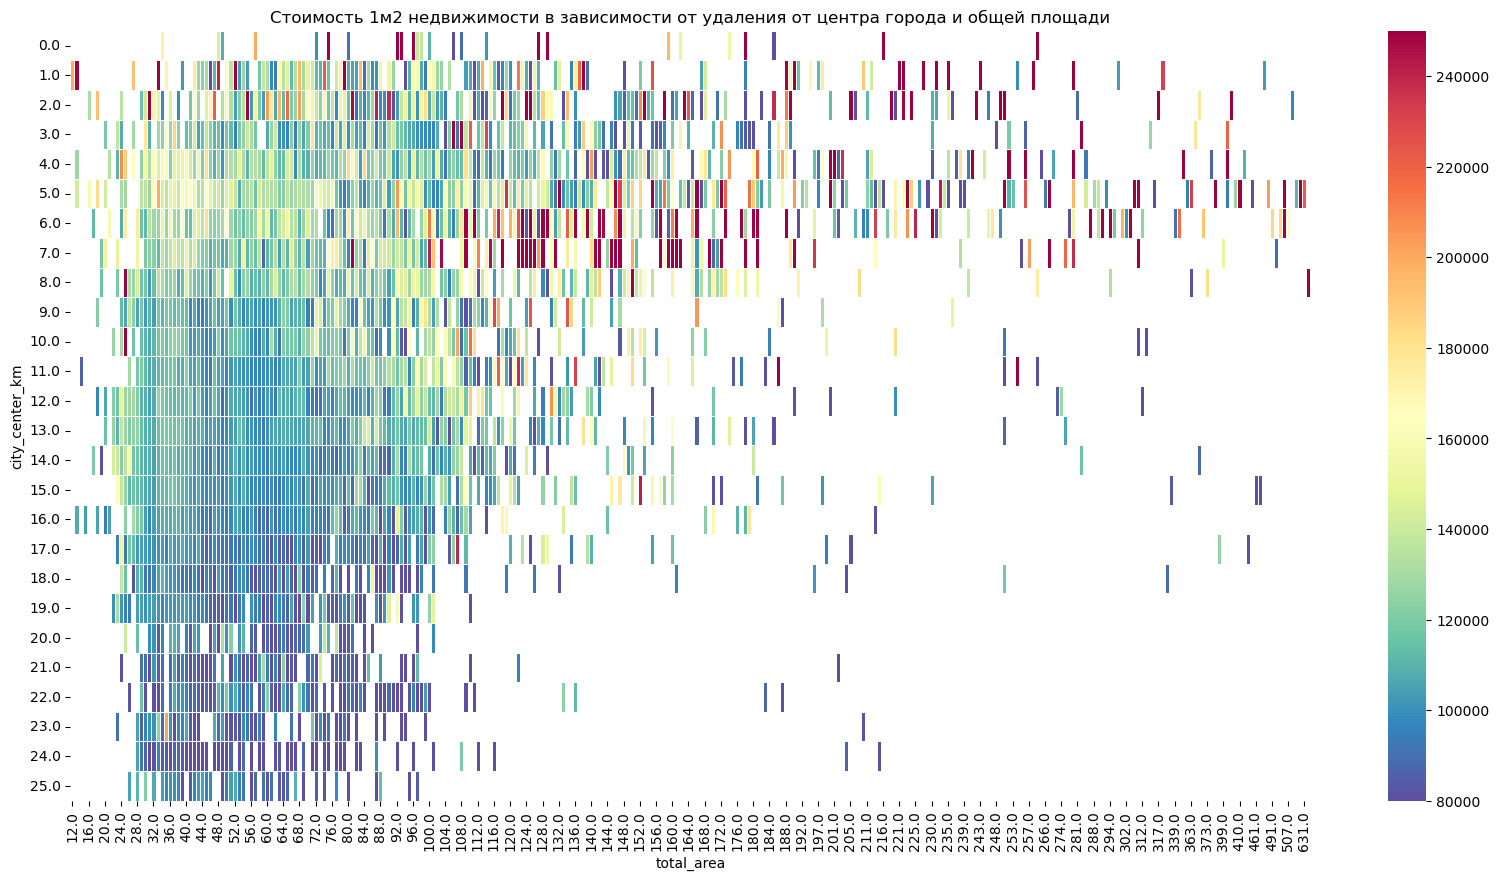

In [78]:
x = data[(data['city_center_km'] <= 25)]
x = x.round(0)
x = x.pivot_table(index = ['city_center_km'], columns = ['total_area'], values = 'squire_meter_price', aggfunc = 'mean')

#define figure size
fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(x, cmap = "Spectral_r", cbar = True, linewidth = 0.5, vmin = 80000, vmax = 250000)
ax.set_title('Стоимость 1м2 недвижимости в зависимости от удаления от центра города и общей площади')

plt.show()

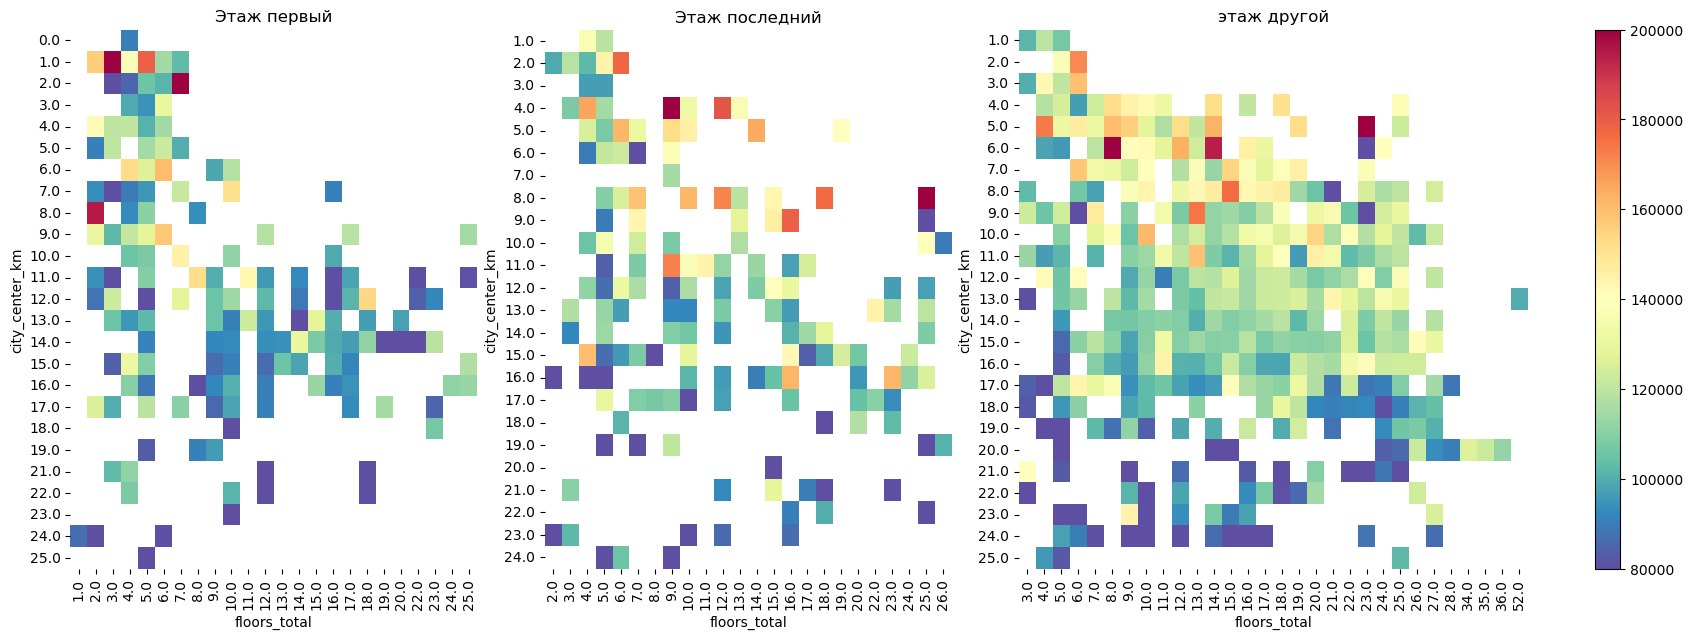

In [79]:
x= data[(data['floor_type'] == 'первый') & (data['city_center_km'] <= 25) & (data['ceiling_height'] > 2.6) & (data['ceiling_height'] <= 3.0)]
y = data[(data['floor_type'] == 'последний') & (data['city_center_km'] <= 25) & (data['ceiling_height'] > 2.6) & (data['ceiling_height'] <= 2.8)]
z = data[(data['floor_type'] == 'другой') & (data['city_center_km'] <= 25) & (data['ceiling_height'] > 2.6) & (data['ceiling_height'] <= 2.8)]
x = x.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')
y = y.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')
z = z.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')

dfs = [x,y,z]

widths = [len(d.columns) for d in dfs]
fig, axes = plt.subplots(figsize=(20, 7), ncols = 4,
                         gridspec_kw = {'wspace': 0.2, 'width_ratios': widths + [1.5]})

for title, ax, dfi, in zip(['Этаж первый','Этаж последний',\
                            'этаж другой'],axes[:len(dfs)], dfs):
    sns.heatmap(dfi, ax = ax, cbar = False, cmap = 'Spectral_r', vmax = 200000, vmin = 80000)
    ax.set_title(title)

fig.colorbar(axes[2].collections[0], cax = axes[-1])

plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо за отдельное доп исследование элитных квартир, за лёгкую экскурсию). Благодарю за совместную работу и желаю успехов далее
</div>

Сравнение стоимости 1м2 недвижимости в домах с высотой потолков от 2,6 до 3 метров включительно.

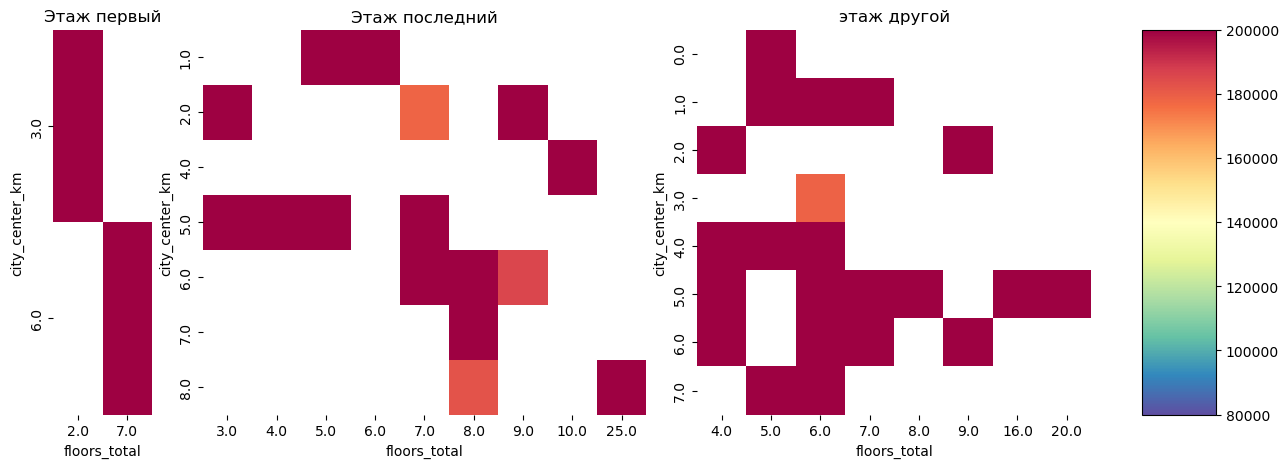

In [80]:
x= data[(data['floor_type'] == 'первый') & (data['city_center_km'] <= 25) & (data['is_elite'])]
y = data[(data['floor_type'] == 'последний') & (data['city_center_km'] <= 25) & (data['is_elite'])]
z = data[(data['floor_type'] == 'другой') & (data['city_center_km'] <= 25) & (data['is_elite'])]
x = x.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')
y = y.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')
z = z.pivot_table(index = ['city_center_km'], columns = ['floors_total'], values = 'squire_meter_price', aggfunc = 'mean')

dfs = [x,y,z]

widths = [len(d.columns) for d in dfs]
fig, axes = plt.subplots(figsize = (15, 5), ncols = 4,
                         gridspec_kw={'wspace': 0.2, 'width_ratios': widths + [1.5]})

for title, ax, dfi, in zip(['Этаж первый','Этаж последний',\
                            'этаж другой'],axes[:len(dfs)], dfs):
    sns.heatmap(dfi, ax = ax, cbar = False, cmap = 'Spectral_r', vmax = 200000, vmin = 80000)
    ax.set_title(title)

fig.colorbar(axes[2].collections[0], cax = axes[-1])

plt.show()

Сравнение стоимости 1м2 в элитной недвижимости.

### Напишите общий вывод
**Данные для исследования:**<br>
Архив объявлений о продаже объектов недвижимости в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 годы. <br>

**Цель исследования:** <br>
Определение параметров, влияющих на цену объектов недвижимости.<br>

**По результатам обработки данных определено:**<br>
1. Наибольшая выборка данных присуща Санкт-Петербургу и его пригородам с расстоянием до центра Санкт-петербурга до 35 километров.
2. Определены факторы, влияющие на количество объявлений:
- Дни недели. В выходные количество новых объявлений уменьшается.
- Месяцы. Национальные раздники оказывают сильное влияние на распределение объявлений, кратно количеству выходных дней. Так, к примеру, в январе и мае количество праздничных дней доходит до 10 и общее количество новых объявлений в этих месяцах падает примерно на треть. Также объявлениям присуща сезонность. К лету общее количество новых объявлений снижается, к зиме растёт.
3. Медианное значение времени продажи недвижимости - около 3-х месяцев. Время, которое недвижимость была выставлена на сайте коррелирует с условиями подписки. Так, через 7, 30, 45, 60, 90 дней наблюдаются значительные всплески в данных о времени размещения т.е. большее количество объявлений, чем согласно случайному распределению, снимаются с продажи.
4. При использовании различных методов визуализации были определены престижные районы Санкт-петербурга, а также была объяснена закономерность всплекска стоимости 1м2 жилья на удалении 7ми километров от центра на линейном графике. Этот всплеск характерен для престижных районов Санкт-Петербурга (Приморского и Выборгского) в квартирах с большими размерами кухонь т.е. более элитном жилье. Одновременно с этим была подтверждена гипотиза о том, что второй косвенной характеристикой такого жилья является высота потолков. Эти дома объединяет небольшая этажность 8-12 этажей, но при этом высота потолков преимущественно от 3х метров.
5. Подтверждена гипотиза о влиянии этажности дома и высоты потолков на цену одного квадратного метра и определена методика ранжирования домов по типам (при использовании этих косвенных признаков) для прогнозирования стоимости 1м2 в зависимости от удаления от центра города.
6. Проверено и определено распределение общей площади квартир в зависимости от удаления от центра города. Показано, что стоимость 1м2 площади растёт по мере приблежения к центру, однако и квартиры больей общей площадью также увеличиваются при приближении к центру. На удалении от центра Санкт-Петербурга начиная с 10 километров наличие квартир с большой площадью падает к 25 километрам удаления. То есть, к примеру, на удалении 18-25 километров от центра города квартир общей площадью более 100м2 единицы. Это уже исключение из правил. Отсюда можно сделать вывод, что и типы предлагаемых квартир на этом удалении становятся хуже. Это также оказывает влияние на стоимость, что продемонстрированно на тепловой карте.
7. На основе данных определено влияние близости парков и прудов на стоимость квадратного метра площади. Общая тенденция такова, что чем больше в радиусе трёх километров парков и прудов, тем выше стоимость 1м2. Такая близость присуща более старым и одновременно престижным районам Санкт-Петербурга в которых преимущественно расположены старые невысокие дома с высокими потолками.
8. На основе данных выявлены и определены более престижные районы Санкт-Петербурга с более высокой стоимостью 1м2: <br>
- Московский район (входит в пятёрку крупнейших,  расположен на Московско-Петроградской линии метрополитена);
- Фрунзенский район (район вытянут с севера на юг на 11км, в черте района находится 3 ветки метрополитена);
- Петроградский район (граничит с Приморским, Выборгским, Василеостровским и Центральным районами, в черте 3 ветки метро);
- Выборгский район (расположен в северной части города, в черте района находится 3 ветки метрополитена);
- Калининский район (с севера на юг > 11 км, зелёные зоны занимают 1840 га, в черте Кировско-Выборгская линия метрополитена);
- Приморский район (один из крупнейших районов города, в районе много зелёных зон (1/4 часть района), в черте 3 ветки метро);
9. Согласно проведённому исследованию, средняя стоимость 1м2 площади в недвижимости, расположенной на первых этажах самая низкая. Однако, необходимо, конечно, учитывать объём выборки и то, что сравнение более релевантно для домов одного типа. Такое сравнение было проведено и представлено на тепловой карте для наиболее обшироного и наиболее популярного сегмента недвижимости с высотой потолков от 2,6м до 3 метров включительно. Таким образом, при визуальном сравнении тепловых карт видно, что стоимость квадратного метра увеличивается по траектории первый - последний - другой. Это ещё раз подтверждает взаимосвязь цены и категории этажа. Это правило, очевидно, более характерно для более массового сектора, на котором и проводилось исследование. В категории "элитная недвижимость" это правило уже не действует. Также, при рассмотрении тепловой карты можно увидеть высокую стоимость 1м2 на последних этажах высотных домов. Это новые дома и самые видовые, престижные квартиры и пентхаусы в таких домах располагаются на последних этажах. Поэтому в этой категории домов правило, что последний этаж дешевле промежуточного тоже не действует.
10. Была определена и продемонстрирована взаимосвязь между стоимостью 1м2 недвижимости и годом продажи. Это, в первую очередь, связано с экономической обстановкой в стране. Был продемонстрирован рост общей стоимости недвижимости с 2014 по 2017, пик в 2017 году и снижение с 2017 по 2019 годы.

 <div style="border:solid black 3px; padding: 5px">
<font color="gray">
    <b> В результате проведённого исследования выявлены и определены основные факторы, оказывающие влияние на стоимость 1м2 недвижимости:<br>
- Расстояние до центра города и район (наличие прудов и парков поблизости);<br>
- Тип дома (панельный, монолитный, высота потолков, общая этажность);<br>
- Тип недвижимости (этаж, вид);<br>
- Площадь кухни;<br>
- Общая площадь недвижимости (как фактор, определяющий элитарность. Т.е. большая площадь это, как правило, большая общая стоимость, а значит более дорогой ремонт, хорошее расположение и пр.).<br>

</div>    

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.